**Problem Statement** 
E-commerce company compiles sales report every month. This report contains customer information, product information as well as the sales quantity and discount that is applied to each product that is sold on the website every month. The company wants to analyze this data to optimize their parameters such as inventory, new products, price and discounts. 

**Understanding**
Optimization and prediction go hand in hand especially for e-commerce when previous data is an indicator of what to expect from consumer buying in the later months. It’s also a great way to reduce inefficiency’s due to excess inventory and increase sale quantity. In relation to our dataset, we accomplish this by tuning columns for which the values are set by us such as vendor discount, trade discount and MRP which also can be called pricing strategy. Another technique is to understand what products are selling well and relating this to customer information for product segmentation. 

**Solution**

For  clustering, we will use K-Means, Hierarchical Clustering, DBSCAN, and Gaussian Mixture Models help segment customers or products based on shared characteristics. For pricing classification we will leverage Decision Trees, Random Forests and  Gradient Boosting Machines products into price bands or predict optimal pricing strategies.

- 'actual_date': Upload date
- 'brand_type': Company's own brand (internal) or other (external)
- 'Master_category': Overall category of the item
- 'Business_unit': Handled by what department
- 'Brand': Brand of the product
- 'Style_id': ID of the product
- 'Vendor_article_number': Style ID given by the product provider
- 'Remarks': Color code or color in text
- 'GTIN': Barcode number
- 'Article_type': Subcategory of the product
- 'Po_type': Type of the purchase order
- 'season_Code': Season (fall/winter/summer or before that)
- 'Gender': Product gender
- 'Sub_business_unit': Which handling category in the office
- 'Age': How long it's been in the inventory
- 'Sales_qty': Quantity of this item sold
- 'Sales_wo_tradedisc': Price paid without applying the discount as per the company
- 'Sales_atFullPrice': Quantity of the product sold without discount
- 'MRP_Value': Sales price
- 'Coupon_Disc': Applied after the final cart
- 'Trade_Disc': Given by the e-commerce site
- 'Vendor_Disc': Given by the external vendor
- 'COGS': Cost of goods sold with tax
- 'Booking_Value': Cost of the product as recorded by the accounts team
- 'Sales_Value_extax': Profit without deducting tax
- 'IPP': Product code
- 'COGS_Ex_ET': Cost of goods before paying tax
- 'Category': Same PO type
- 'new_category_head'
- 'new_category_manager'

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Preprocessing
**Read the Dataset and Basic Info:**

In [4]:
import pandas as pd

# Reading the dataset
df_sales = pd.read_excel('salesdata.xlsx')
#df_sales= df_sales[df_sales.brand=='United Colors of Benetton']

In [5]:
# Checking the shape and dimension of the dataset
print(f'The dataset has {df_sales.shape[0]} rows and {df_sales.shape[1]} columns')

The dataset has 154541 rows and 30 columns


In [6]:
print(f'The List of columns available in the dataset is: {df_sales.columns}')

The List of columns available in the dataset is: Index(['actual_date', 'brand_type', 'master_category', 'business_unit',
       'brand', 'style_id', 'vendor_article_number', 'remarks', 'GTIN',
       'article_type', 'po_type', 'season_Code', 'gender', 'sub_business_unit',
       'age', 'Sales_qty', 'Sales_wo_tradedisc', 'Sales_atFullPrice',
       'MRP_Value', 'Coupon_Disc', 'Trade_Disc', 'Vendor_Disc', 'COGS',
       'Booking_Value', 'Sales_Value_extax', 'IPP', 'COGS_Ex_ET', 'category',
       'new_category_head', 'new_category_manager'],
      dtype='object')


In [7]:
print(f'The dataset is a {df_sales.ndim} dimensional dataset')

The dataset is a 2 dimensional dataset


In [8]:
# Checking the datatype, non-null values, and name of each variable in the dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154541 entries, 0 to 154540
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   actual_date            154541 non-null  int64  
 1   brand_type             154541 non-null  object 
 2   master_category        154541 non-null  object 
 3   business_unit          154541 non-null  object 
 4   brand                  154541 non-null  object 
 5   style_id               0 non-null       float64
 6   vendor_article_number  0 non-null       float64
 7   remarks                154541 non-null  object 
 8   GTIN                   0 non-null       float64
 9   article_type           154541 non-null  object 
 10  po_type                154541 non-null  object 
 11  season_Code            154541 non-null  object 
 12  gender                 154541 non-null  object 
 13  sub_business_unit      154541 non-null  object 
 14  age                    154541 non-nu

In [9]:
# Checking for any missing values
missing_values = pd.DataFrame({
    'No. of Missing Values': df_sales.isnull().sum(),
    'Percentage of Missing Values': df_sales.isnull().sum()/df_sales.shape[0] * 100
})
print(missing_values)

                       No. of Missing Values  Percentage of Missing Values
actual_date                                0                      0.000000
brand_type                                 0                      0.000000
master_category                            0                      0.000000
business_unit                              0                      0.000000
brand                                      0                      0.000000
style_id                              154541                    100.000000
vendor_article_number                 154541                    100.000000
remarks                                    0                      0.000000
GTIN                                  154541                    100.000000
article_type                               0                      0.000000
po_type                                    0                      0.000000
season_Code                                0                      0.000000
gender                   

In [10]:
# Dropping columns with significant missing values and those identified as IDs
df_sales.drop(['style_id', 'vendor_article_number', 'GTIN', 'IPP'], axis=1, inplace=True)

**Convert Date Column and Encode 'Age':**

In [11]:
# Encoding 'age' column
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_sales['age_categories'] = df_sales['age'].str.split().str[-1]

ordinal_categories = [
    ['Not_Yet_Pick'],
    ['0-30'],
    ['31-90'],
    ['91-150'],
    ['151-180'],
    ['181-360'],
    ['361-540'],
    ['540+']
]

encoder.fit(ordinal_categories)
df_sales['age_encoded'] = encoder.transform(df_sales[['age_categories']])
df_sales.drop(columns=['age_categories', 'age'], inplace=True)

/Users/ajithpanneerselvam/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


**Dropping Columns and Separate Numerical and Categorical Data:**

In [12]:
# Dropping redundant or unnecessary columns
df_sales.drop(['COGS_Ex_ET', 'actual_date'], axis=1, inplace=True)

# Separating numerical and categorical columns
import numpy as np
df_cat = df_sales.select_dtypes(include=['object'])
df_num = df_sales.select_dtypes(include=np.number)

print(df_cat.head())
print(df_num.head())

  brand_type master_category business_unit                      brand remarks  \
0   External     Accessories     Men's LTA  United Colors of Benetton   Black   
1   External     Accessories     Men's LTA  United Colors of Benetton     501   
2   External     Accessories     Men's LTA  United Colors of Benetton    Wine   
3   External     Accessories       Watches  United Colors of Benetton  Silver   
4   External     Accessories   Women's LTA  United Colors of Benetton   Olive   

  article_type po_type season_Code  gender sub_business_unit category  \
0   Laptop Bag    PPMP         Old  Unisex         Men's LTA     PPMP   
1        Socks    PPMP         Old  Unisex         Men's LTA     PPMP   
2    Backpacks  MMB-OR         Old  Unisex         Men's LTA   MMB-OR   
3      Watches  MMB-OR         Old     Men           Watches   MMB-OR   
4     Handbags  MMB-OR         Old   Women       Women's LTA   MMB-OR   

  new_category_head new_category_manager  
0            Sophia            

In [13]:
df_cat.brand_type.value_counts()

brand_type
External    154540
Private          1
Name: count, dtype: int64

In [14]:
df_cat.master_category.value_counts()

master_category
Apparel        141159
Accessories      6756
Footwear         3414
others           3212
Name: count, dtype: int64

In [15]:
df_cat.season_Code.value_counts()

season_Code
Old     154151
FW19       329
SS19        36
SS18        14
FW18        11
Name: count, dtype: int64

In [16]:
df_cat['gender_mapped'] = df_cat['gender'].map(lambda x: 'Men' if x == 'Boys' else 'Women' if x == 'Girls' else 'Unisex' if x == 'Unisex Kids' else x)

In [17]:
df_cat['gender_mapped'].value_counts()

gender_mapped
Men       97407
Women     53086
Unisex     4048
Name: count, dtype: int64

In [18]:
df_c= df_cat[['master_category', 'season_Code', 'gender_mapped' ]]
df_c= pd.get_dummies(df_c, drop_first = True, dtype=int)

**UNIVARIATE ANALYSIS:**

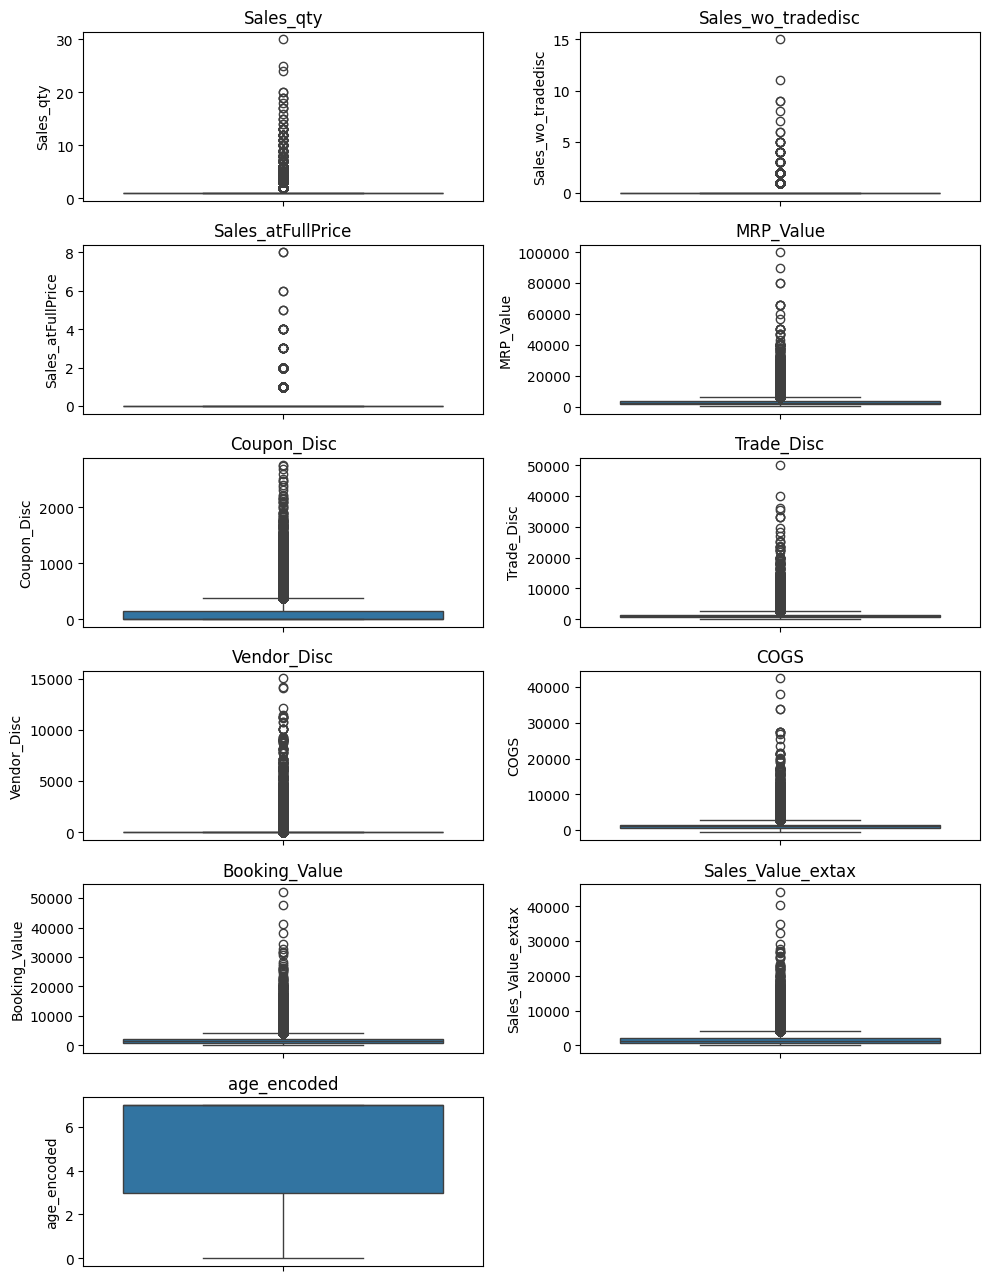

In [19]:
# univariant analysis:
import matplotlib.pyplot as plt
import seaborn as sns
t=1
plt.figure(figsize=(10,15))
for i in df_num.columns:
    plt.subplot(7,2,t)
    sns.boxplot(df_sales[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

**MULTIVARIATE ANALYSIS:**

<Axes: >

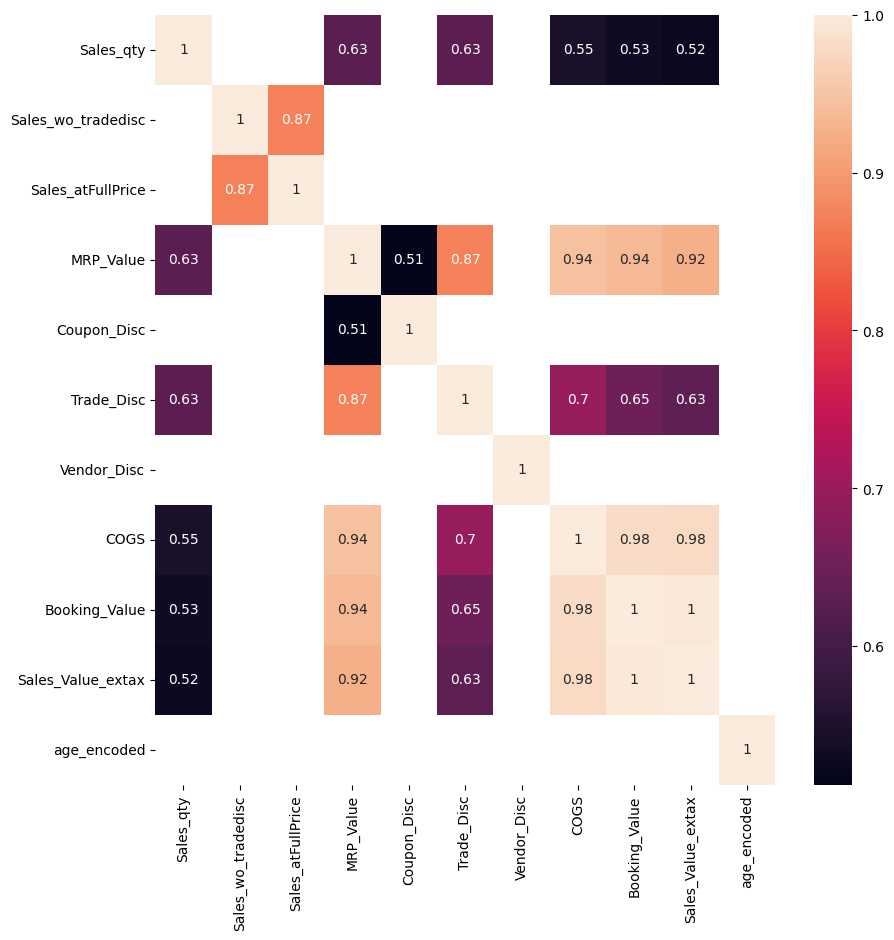

In [20]:
# MULTIVARIANT analysis:
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr()[(df_num.corr()>=0.50) | (df_num.corr()<=-0.50)],annot=True)

<Axes: >

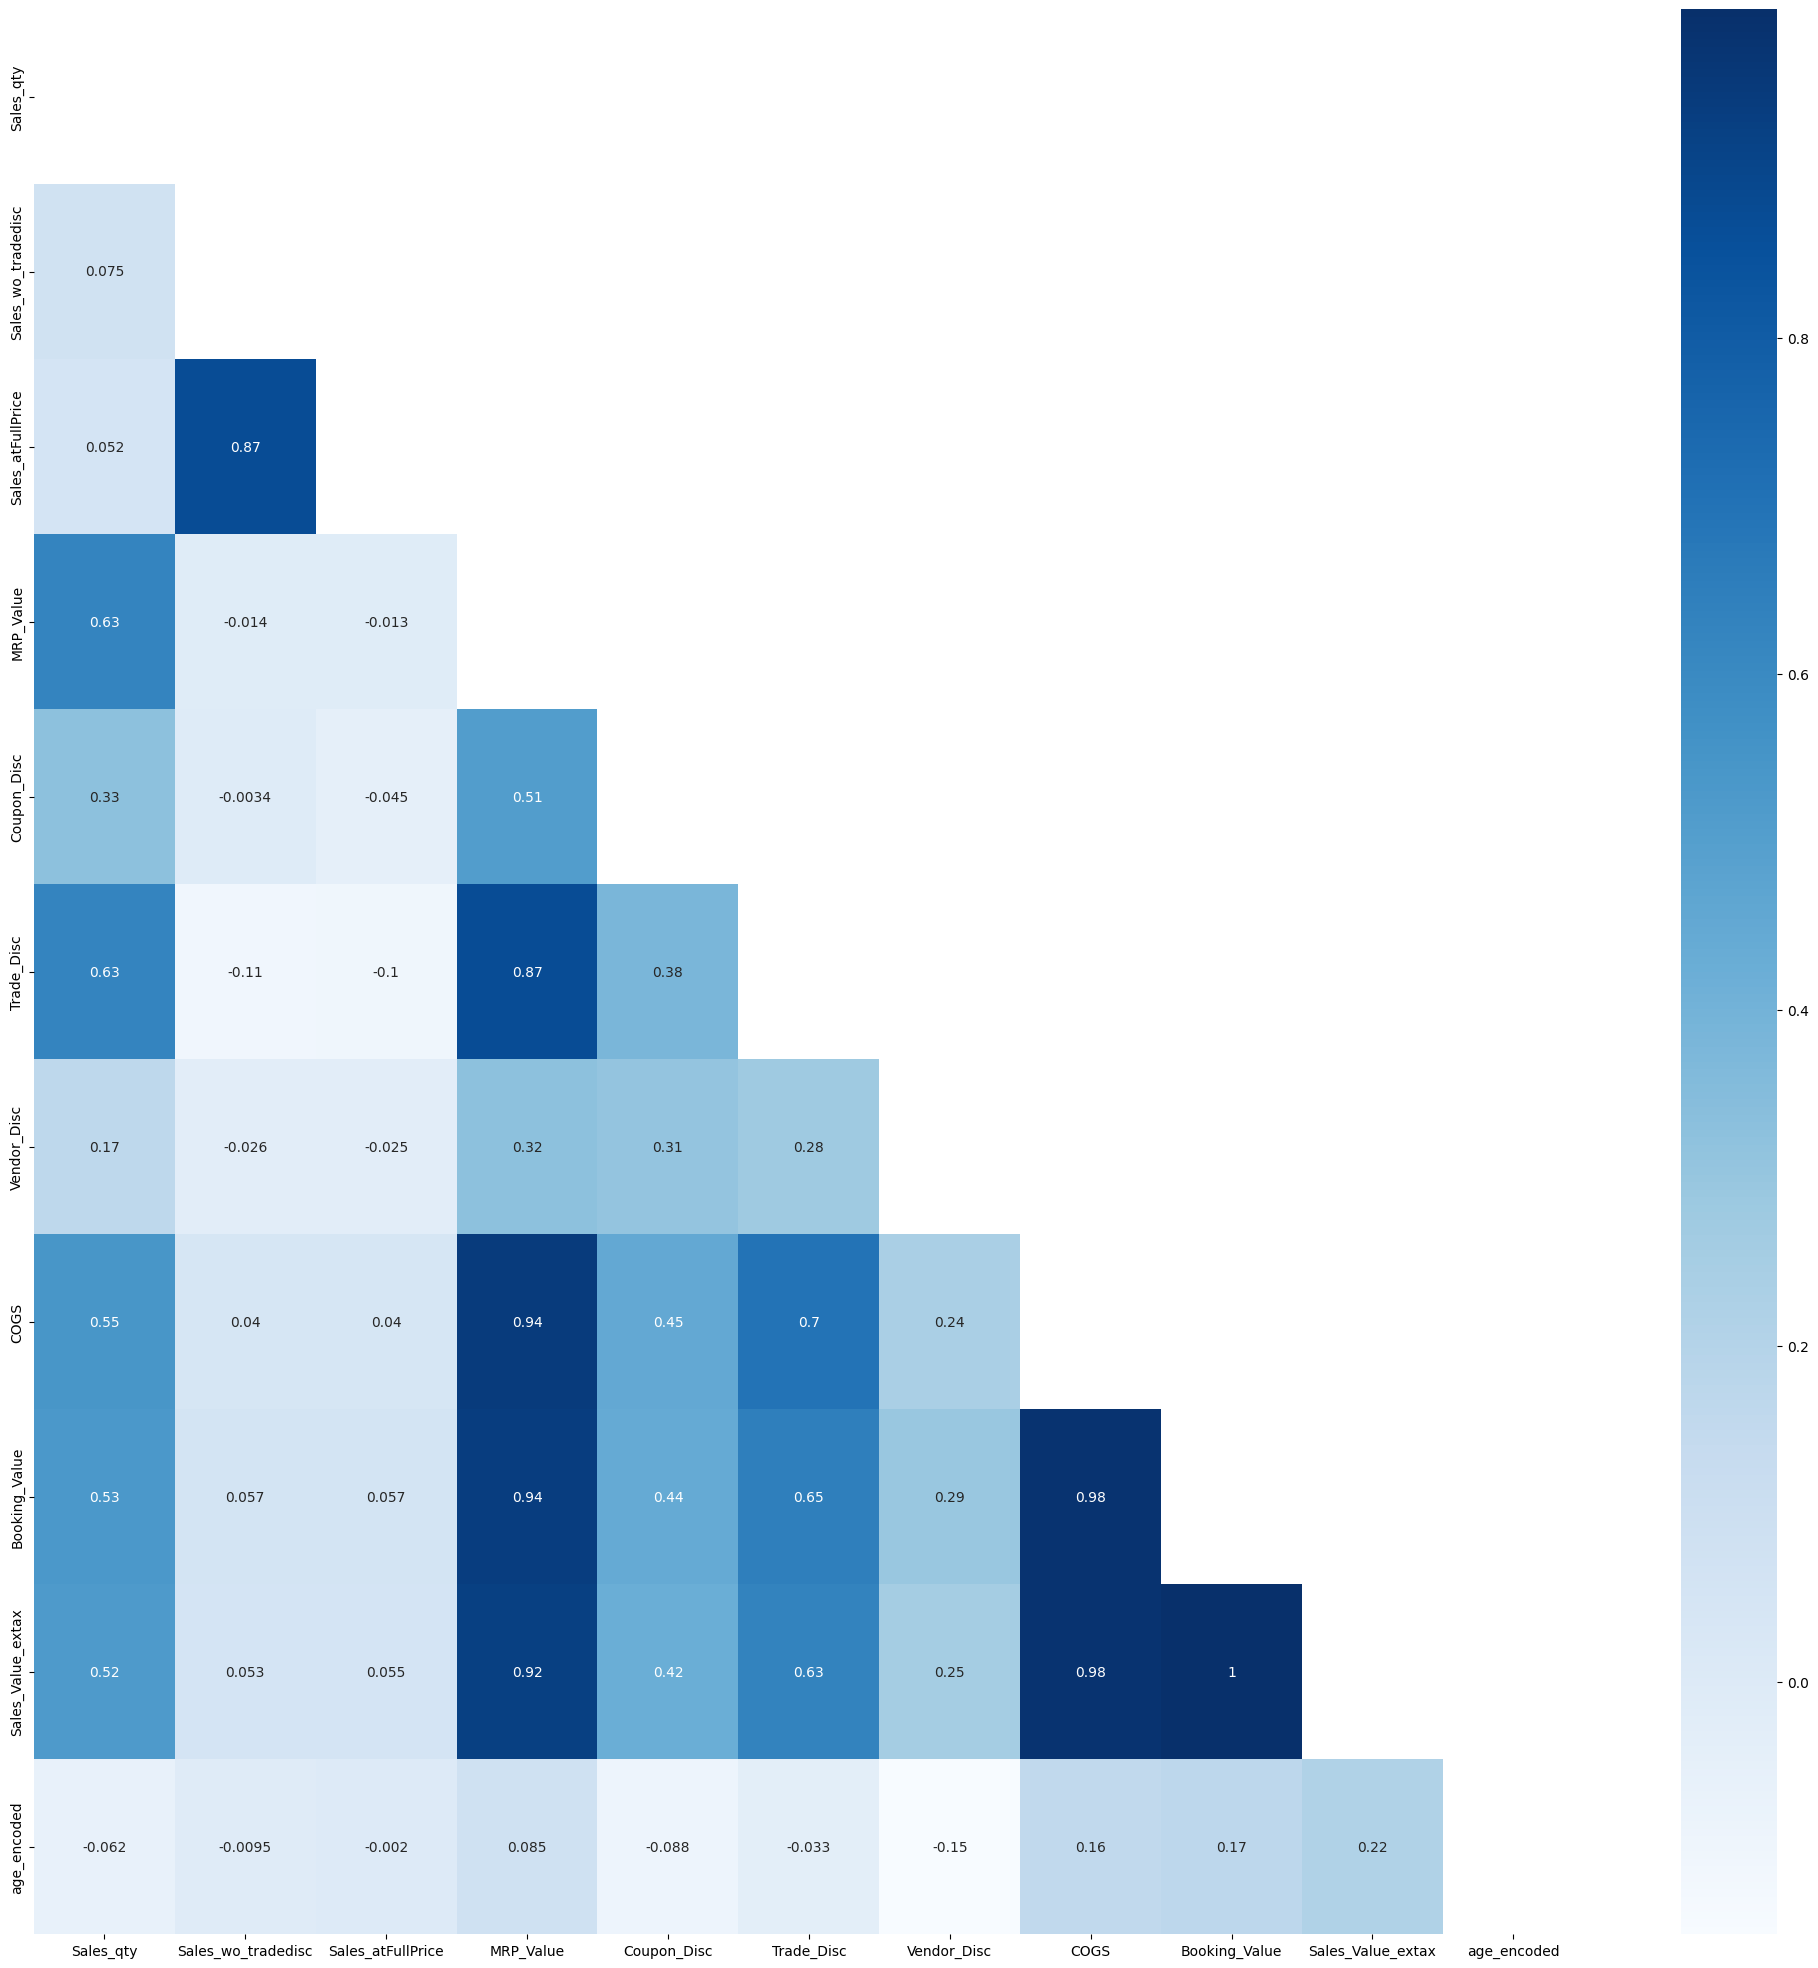

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25,25))

sns.heatmap(df_num.corr() , annot = True , cmap = 'Blues' , mask = np.triu(df_num.corr()))

Let's analyze the insights we can draw from the heatmap based on the provided details:

1. **Sales Quantity (Sales_qty):** Darker shades likely represent products with higher sales quantities. These items are popular and contribute significantly to revenue.

2. **Maximum Retail Price (MRP_Value):** Darker areas indicate higher MRP values. These might be premium products or items with higher profit margins.

3. **Cost of Goods Sold (COGS):** Darker shades suggest higher COGS. It's essential to manage costs effectively to maintain profitability.

4. **Discounts (Vendor_Disc, Trade_Disc, Coupon_Disc):** Lighter shades in these areas imply lower discounts. Companies may need to optimize discount strategies for better sales.

5. **Inventory Age (Age):** Darker regions may represent older inventory. Managing aging stock is crucial to prevent obsolescence.

6. **Profit (Sales_Value_extax):** Darker shades indicate higher profits. Companies should focus on products with better margins.

7. **Business Units (Business_unit):** Observe patterns across different business units. Some units may perform better than others.

8. **Gender and Seasonal Trends:** Check if specific genders or seasonal products stand out in the heatmap.


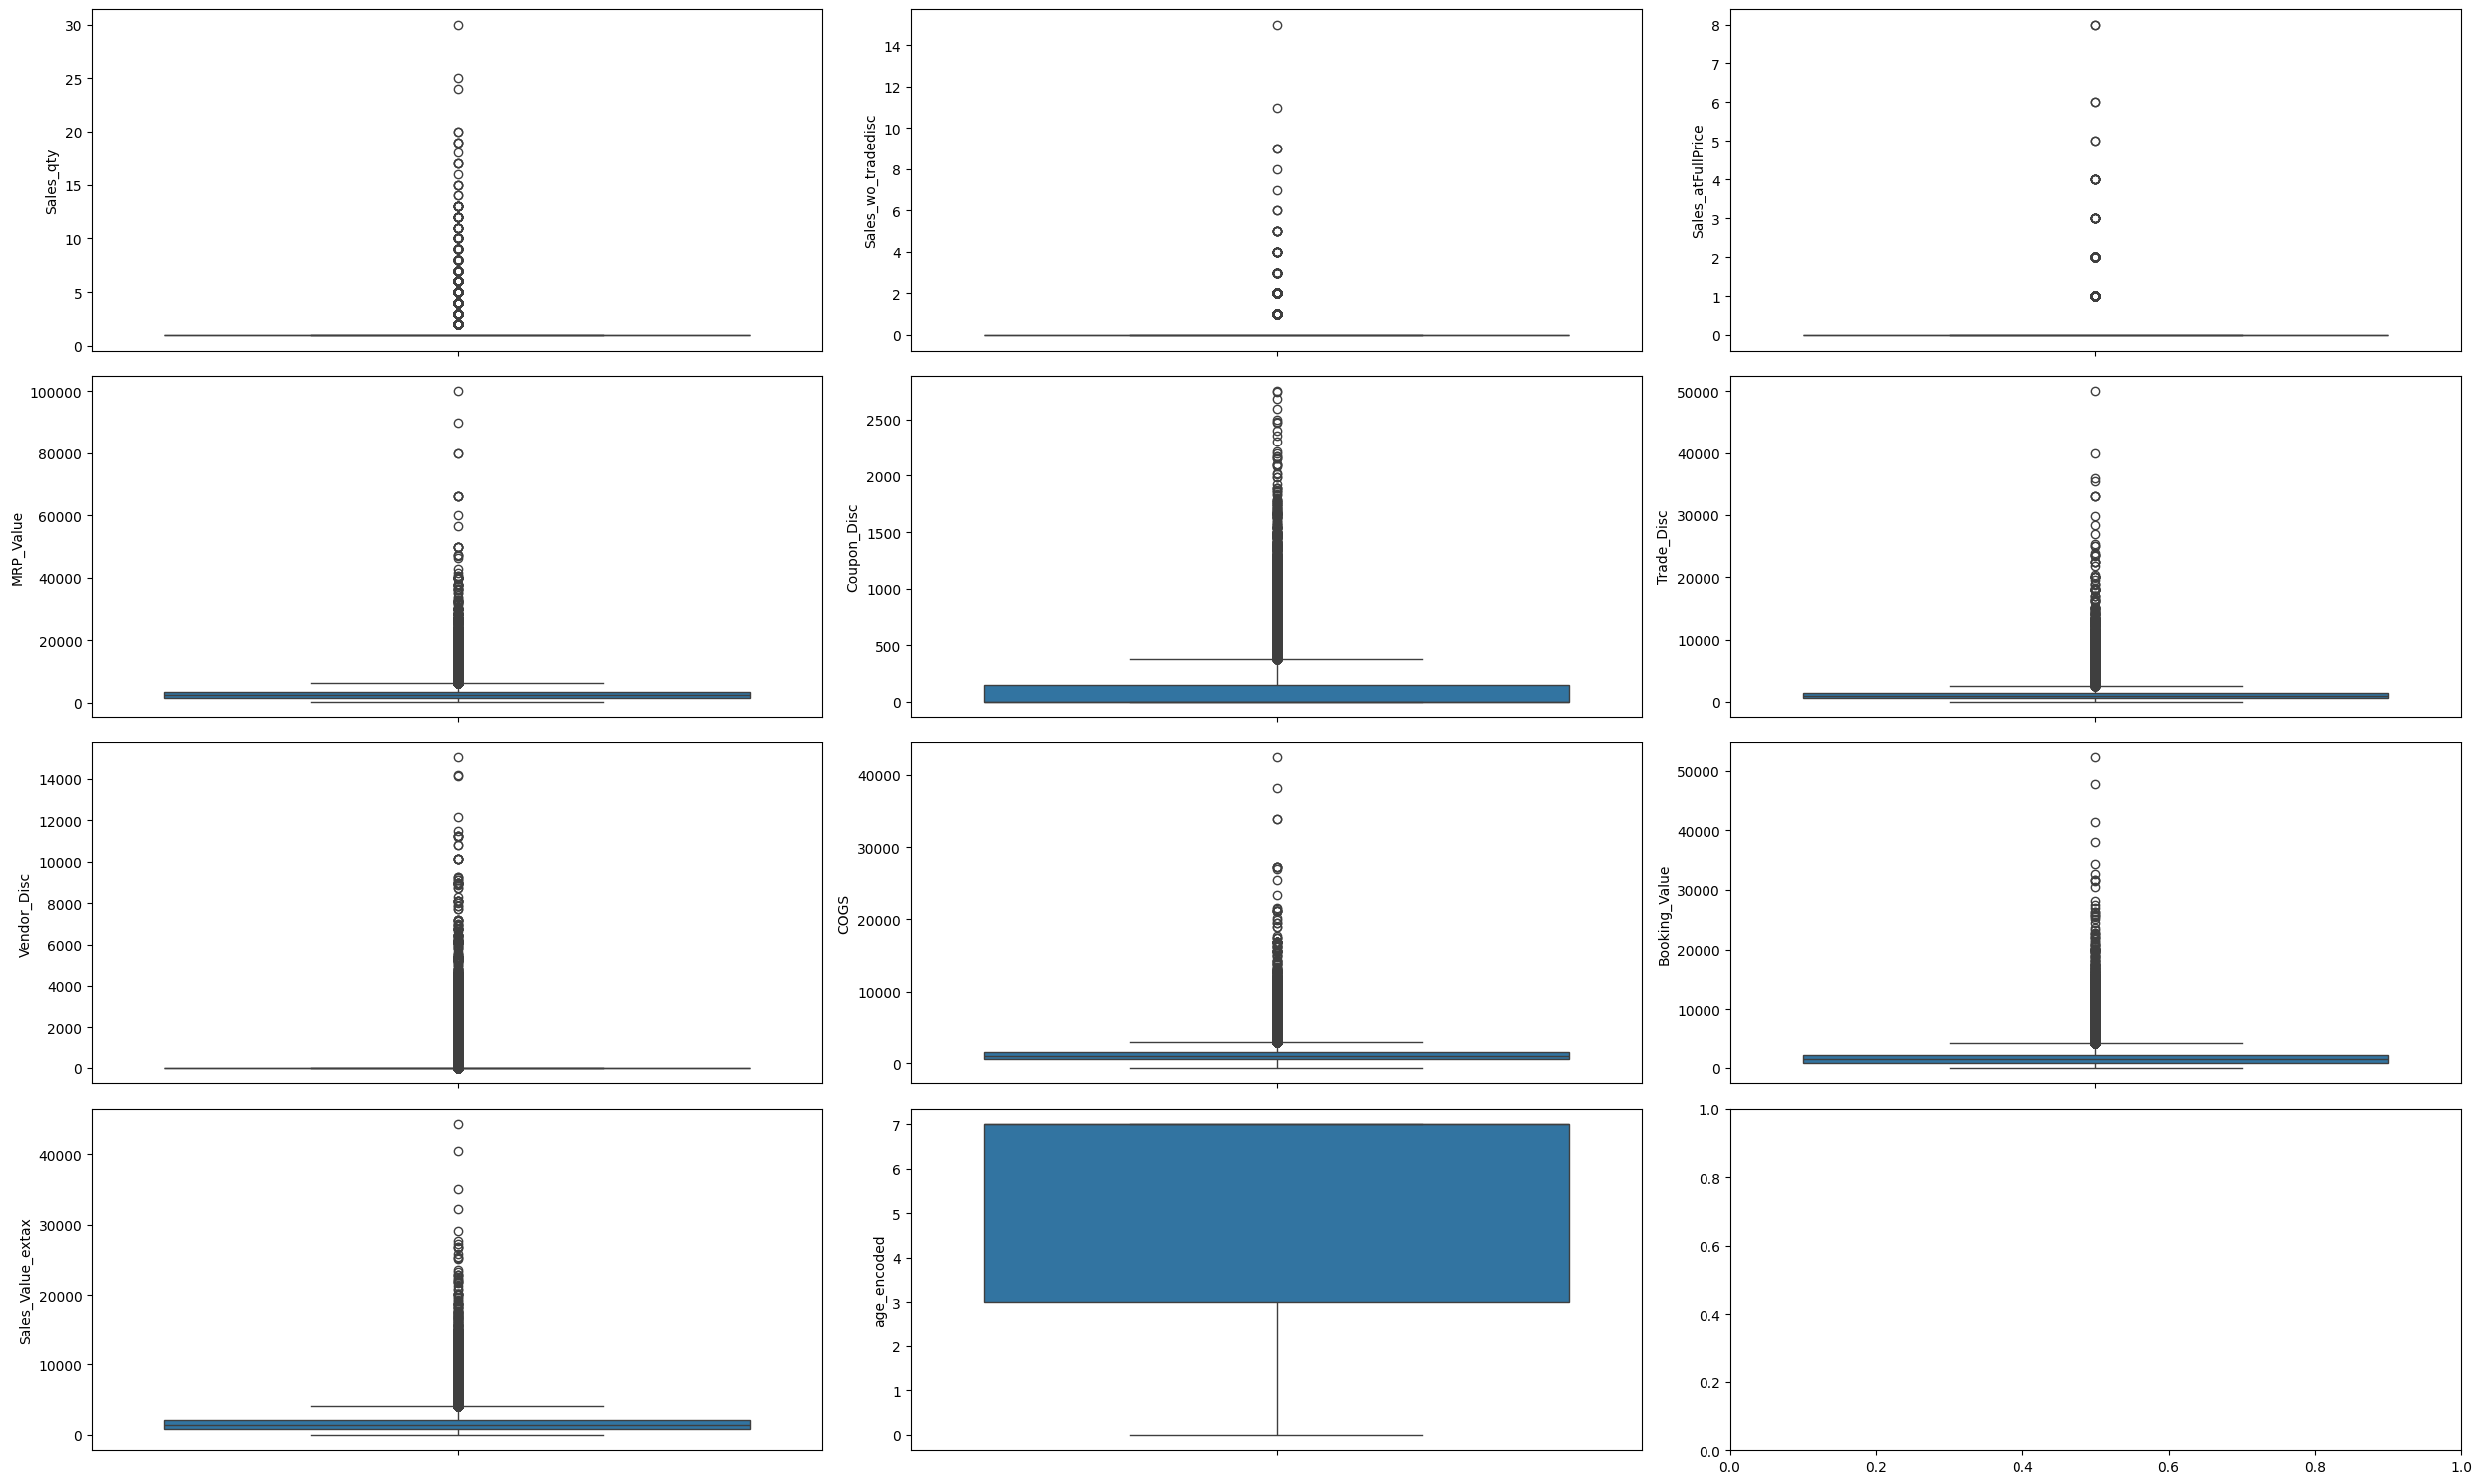

In [22]:
# Checking for outliers

f , ax = plt.subplots(4,3 , figsize = (25,15))

for i,v in zip(df_num.columns , ax.flatten()):
    sns.boxplot(y = df_sales[i] , ax = v)
    
plt.tight_layout()
plt.show()

# Handling Outliers and Scaling Data
**Outlier Treatment**

In [23]:
from sklearn.preprocessing import PowerTransformer

out_cols = ['Sales_qty', 'Sales_wo_tradedisc', 'Sales_atFullPrice', 'MRP_Value',
       'Coupon_Disc', 'Trade_Disc', 'Vendor_Disc', 'COGS', 'Booking_Value',
       'Sales_Value_extax']

pt = PowerTransformer()
for col in out_cols:
    df_num[col] = pt.fit_transform(df_num[[col]])


In [24]:
df_num

,Sales_qty,Sales_wo_tradedisc,Sales_atFullPrice,MRP_Value,Coupon_Disc,Trade_Disc,Vendor_Disc,COGS,Booking_Value,Sales_Value_extax,age_encoded
0,-0.411399,-0.121906,-0.106743,-0.130990,-0.869487,-0.448039,-0.387117,-0.073805,0.197400,0.255487,7.0
1,-0.411399,-0.121906,-0.106743,-4.466589,-0.869487,-2.698614,-0.387117,-1.515421,-2.445730,-2.387329,7.0
2,-0.411399,-0.121906,-0.106743,-0.130990,-0.869487,-0.448039,-0.387117,-0.500166,0.209615,0.038940,1.0
3,-0.411399,-0.121906,-0.106743,0.671445,0.930351,0.738830,-0.387117,0.179444,0.492603,0.312279,6.0
4,-0.411399,-0.121906,-0.106743,0.270071,-0.869487,0.522442,-0.387117,-0.239291,0.060174,-0.109907,3.0
...,...,...,...,...,...,...,...,...,...,...,...
154536,-0.411399,-0.121906,-0.106743,-1.545745,-0.869487,-0.971435,-0.387117,-1.017559,-1.121707,-1.061619,7.0
154537,-0.411399,-0.121906,-0.106743,-0.475693,1.133738,-0.347814,-0.387117,-0.489958,-0.523063,-0.464832,7.0
154538,-0.411399,-0.121906,-0.106743,0.211103,1.133738,0.159655,-0.387117,-0.275933,0.135531,0.191564,7.0
154539,-0.411399,-0.121906,-0.106743,0.947947,1.221401,1.019534,2.585460,0.177479,0.645392,0.545703,3.0


# Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)


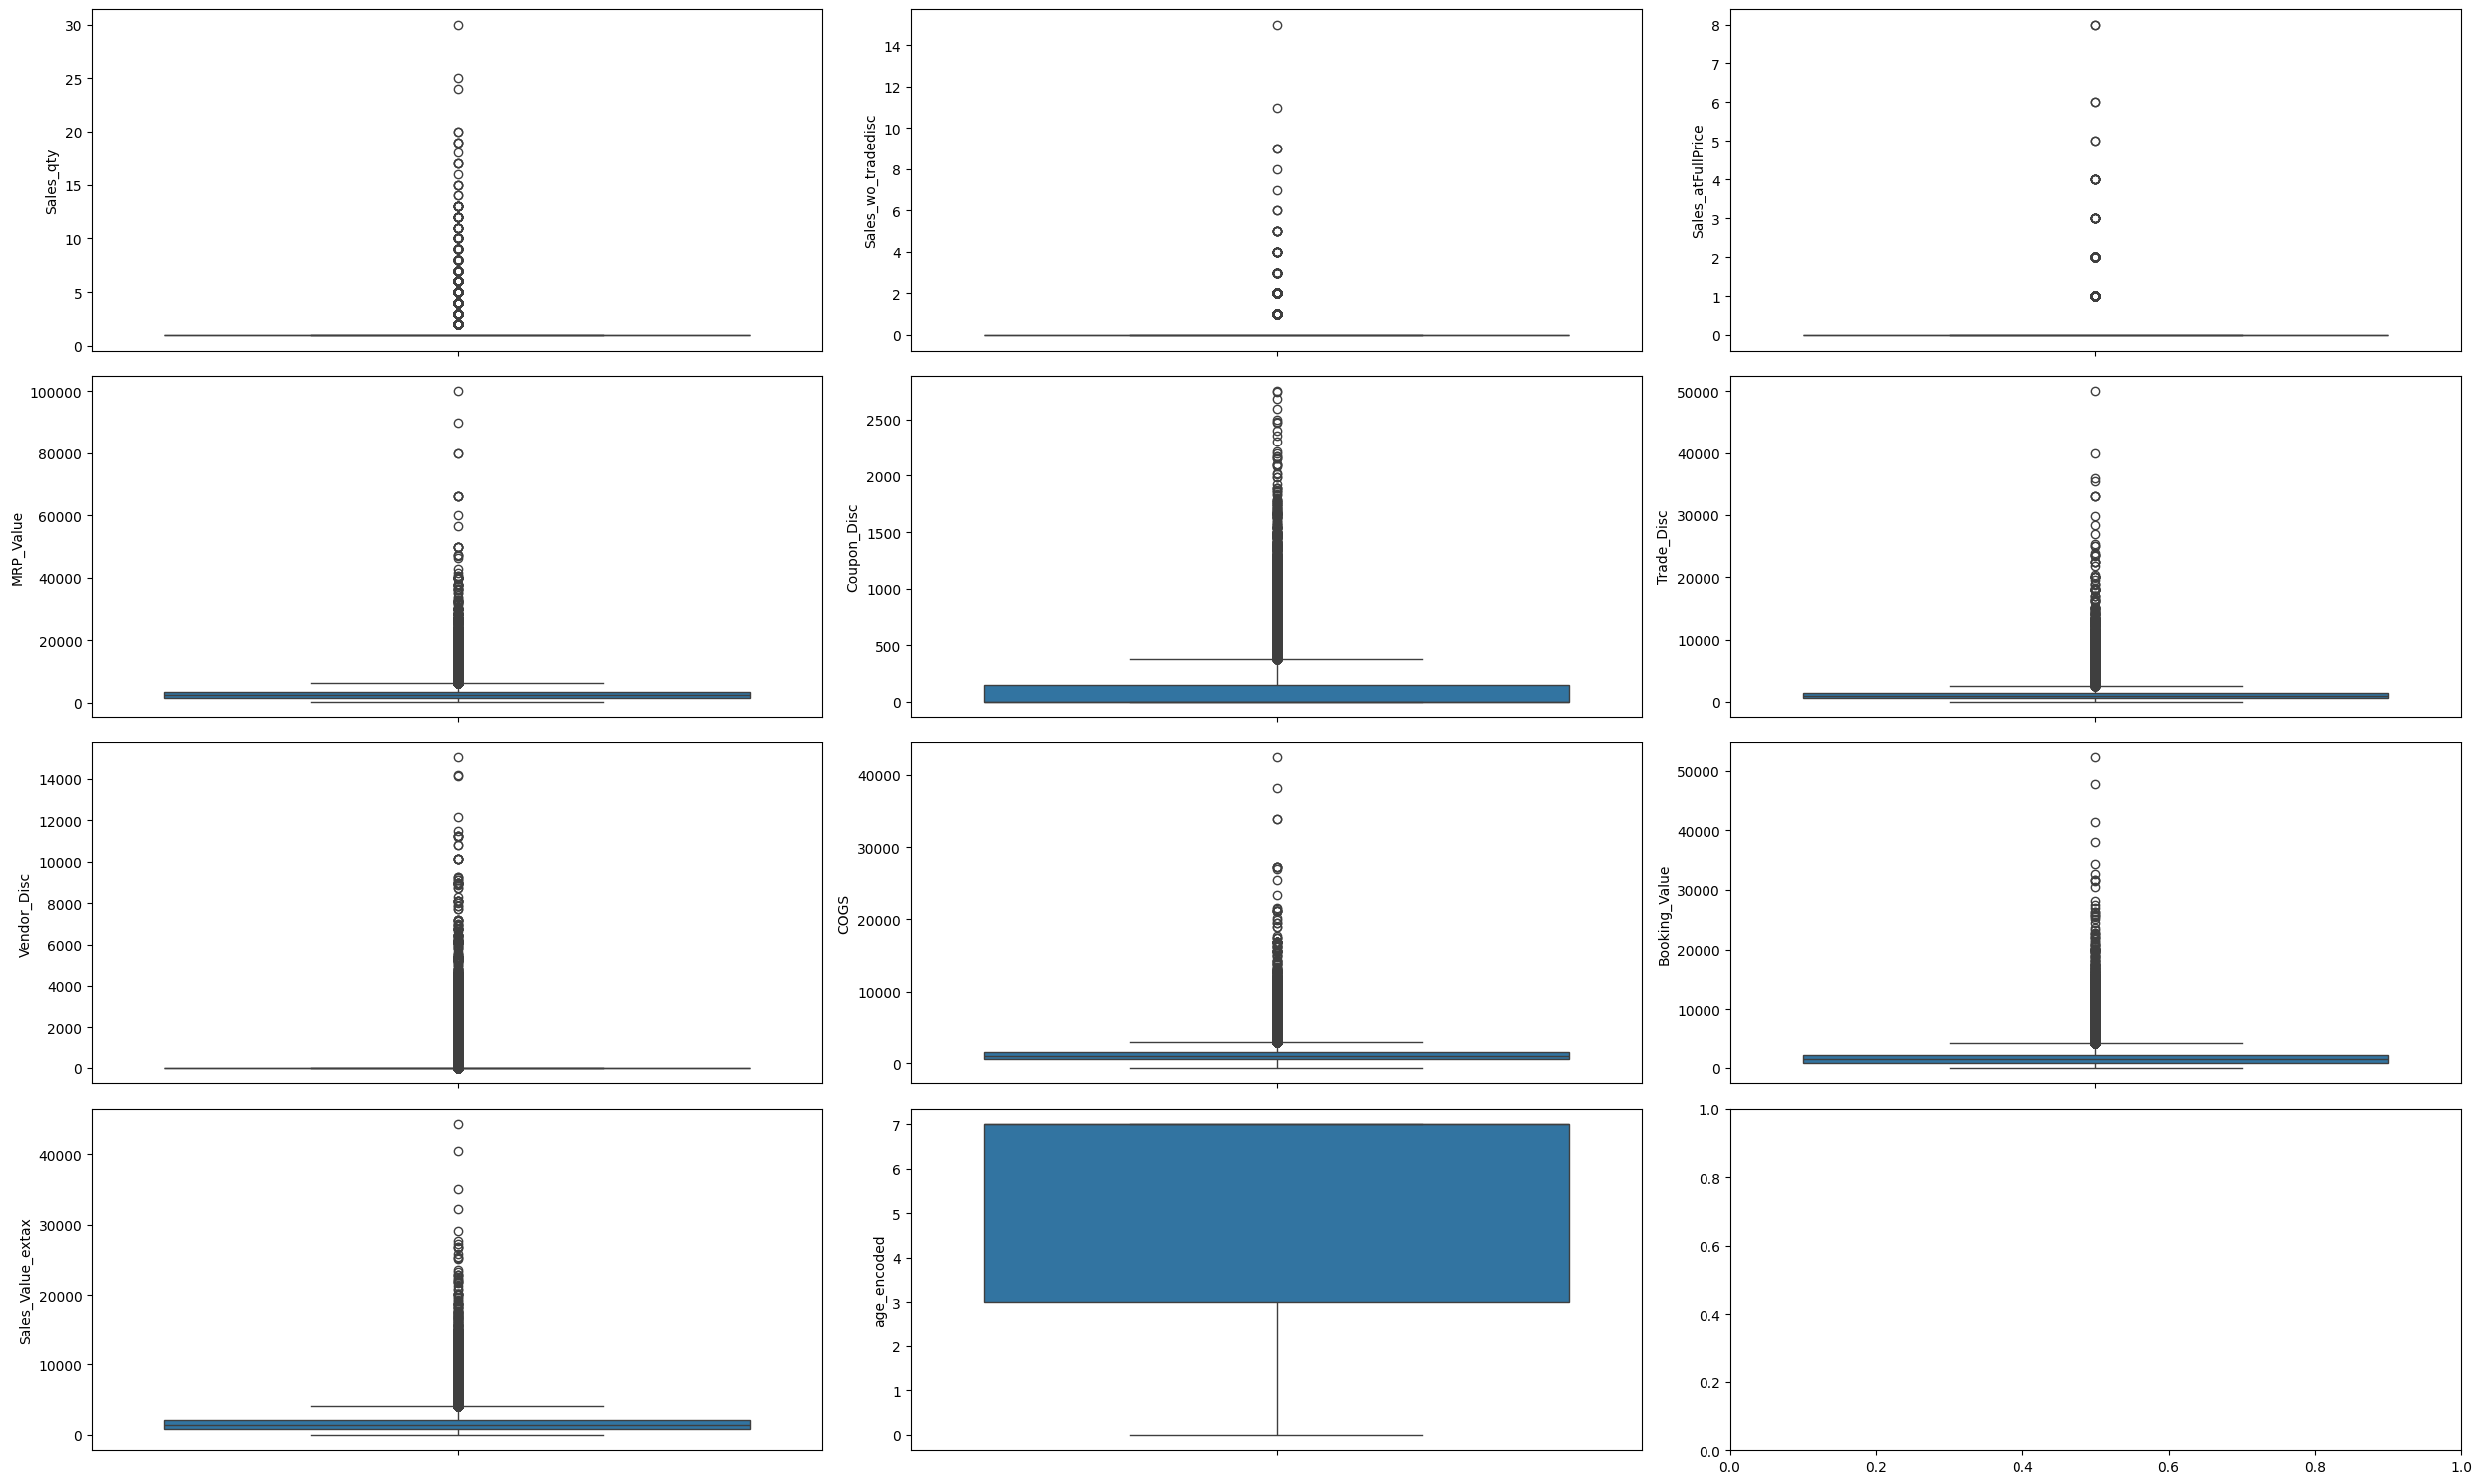

In [26]:
# Checking for outliers

f , ax = plt.subplots(4,3 , figsize = (25,15))

for i,v in zip(df_num.columns , ax.flatten()):
    sns.boxplot(y = df_sales[i] , ax = v)
    
plt.tight_layout()
plt.show()

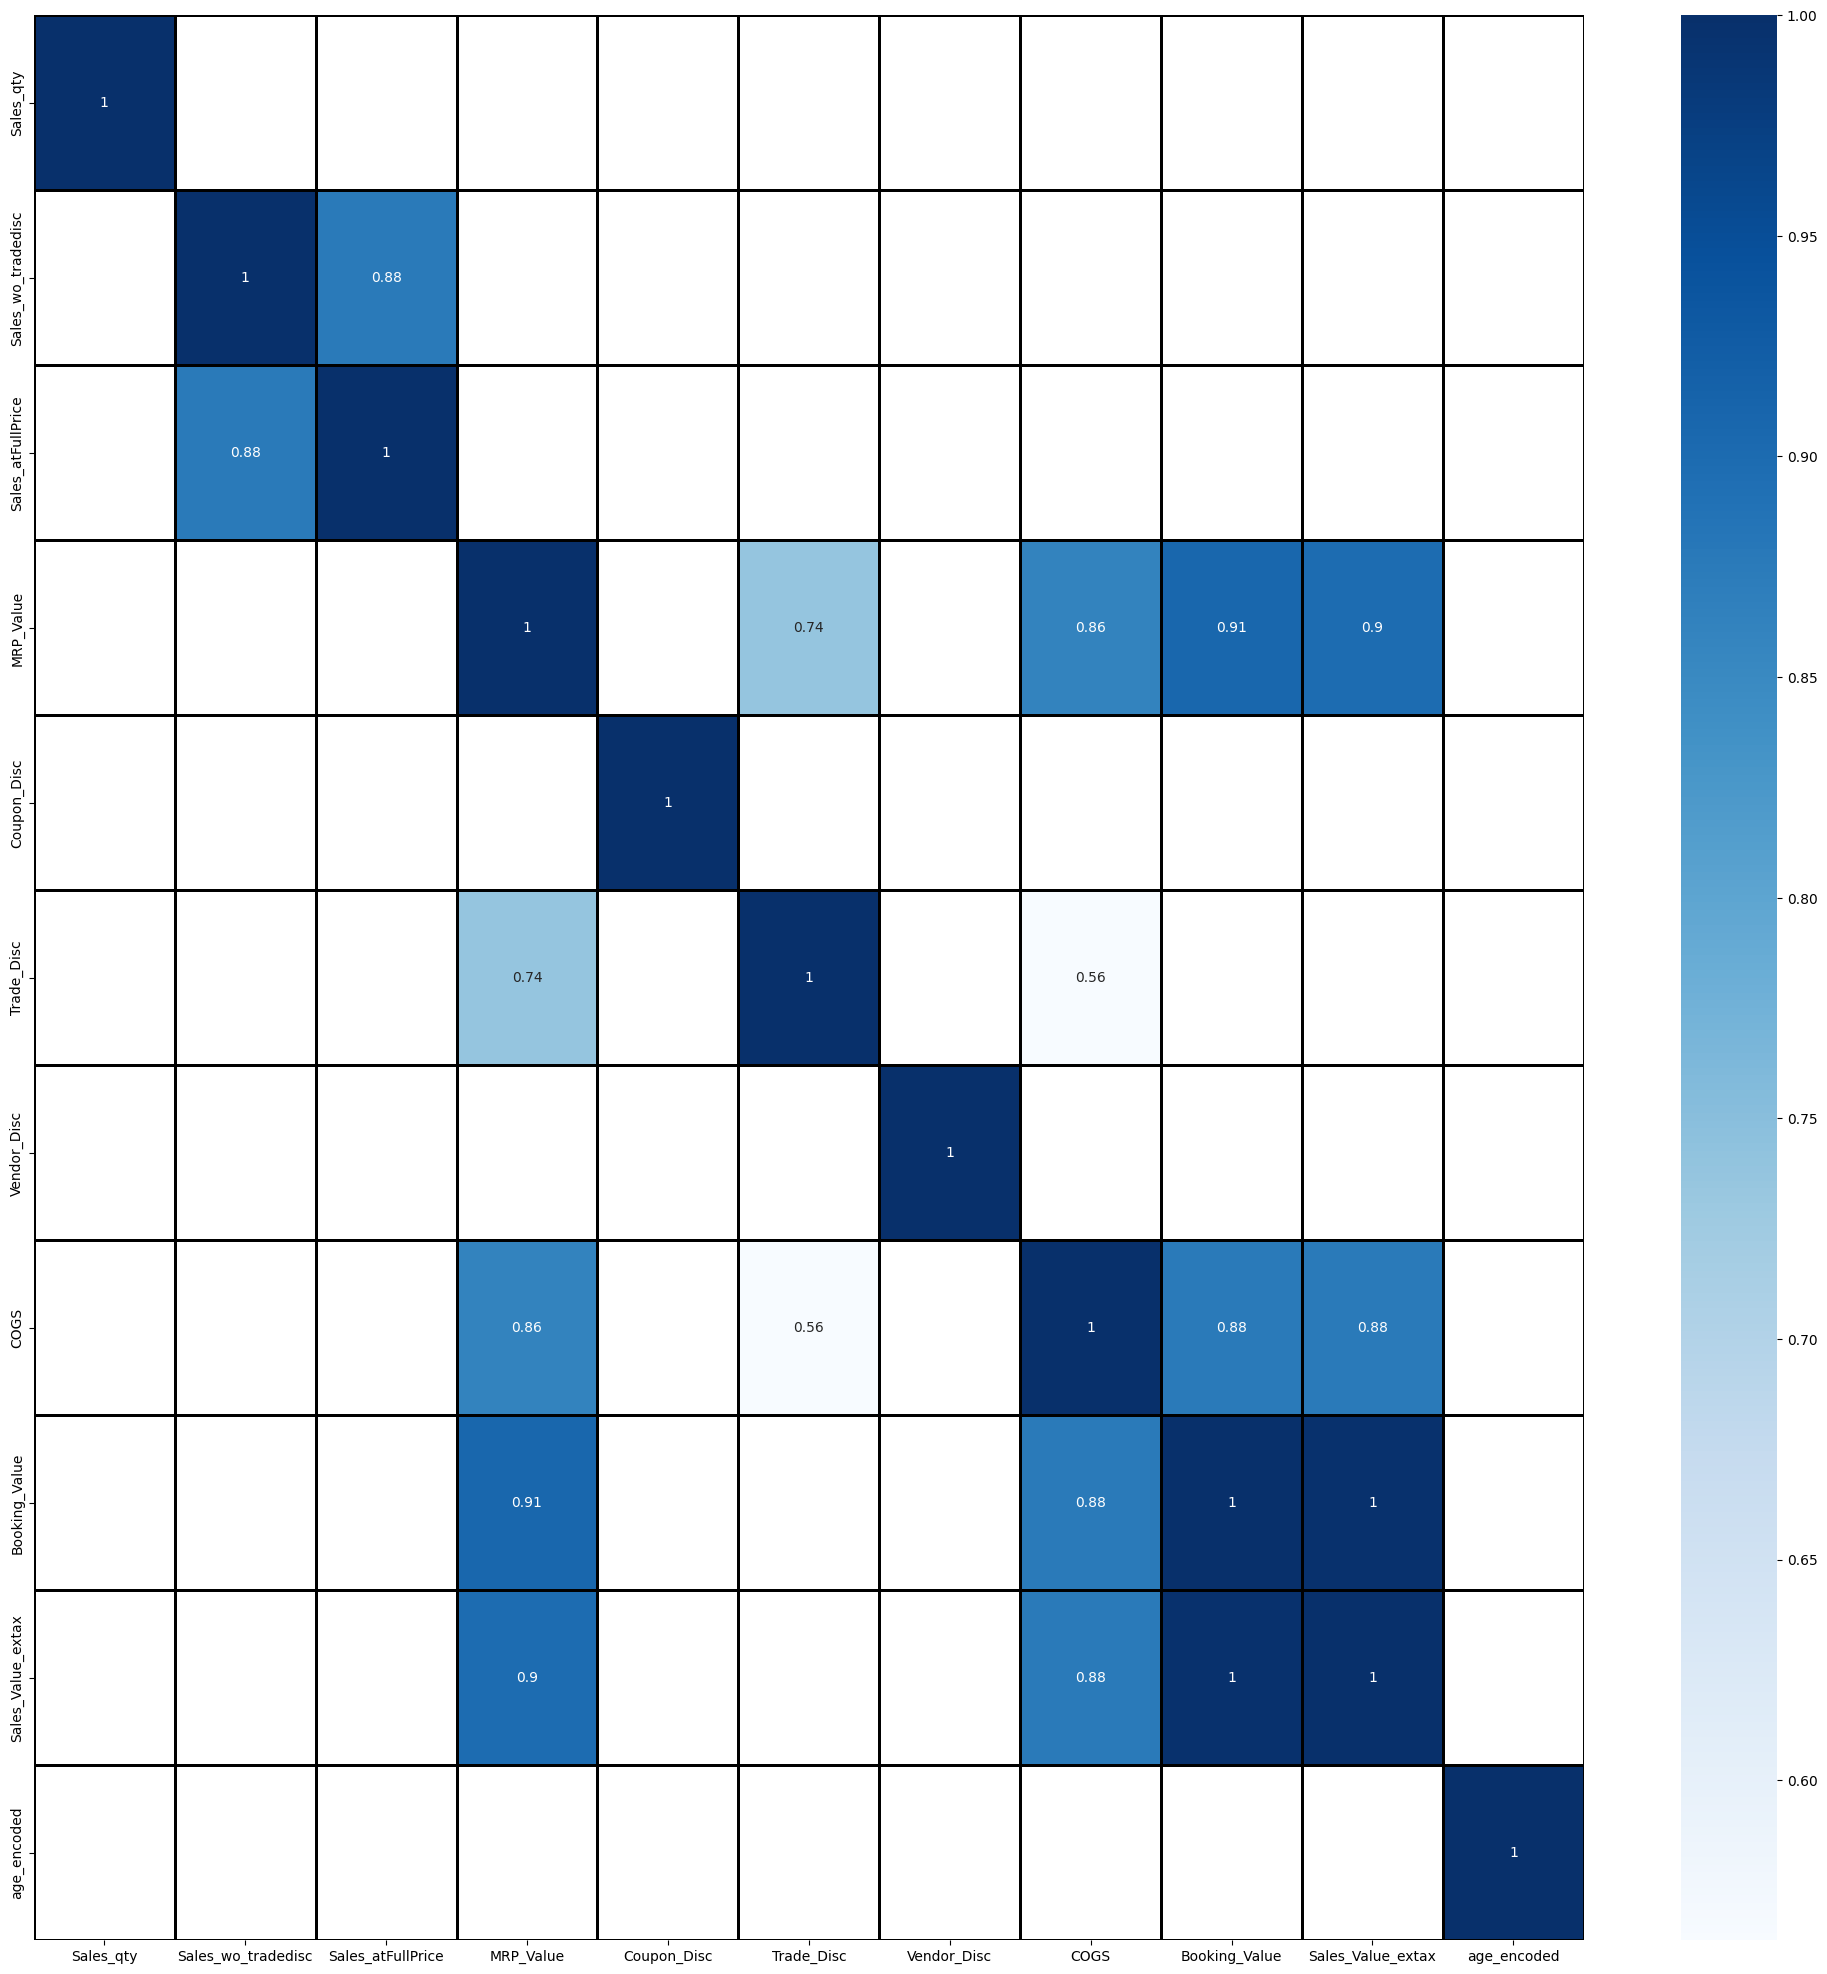

In [27]:
#Trying to figure out when to apply PCA based on the correlation:
plt.figure(figsize = (25,25))
sns.heatmap(df_num.corr()[(df_num.corr() > 0.5) | (df_num.corr() < -0.5) ] , annot = True , cmap = 'Blues' , 
           linewidth = 1.0 , linecolor = 'Black')
plt.show()

**INFERENCE:**
Based on the correlation heatmap, the following pairs or groups of variables exhibit multicollinearity:

Sales_atFullPrice and sales_wo_tradedisc are highly correlated, indicating multicollinearity between these two variables.

Trade_Disc, COGS, Booking_Value, and Sales_Value_extax are highly correlated with MRP_Value, suggesting the presence of multicollinearity among these variables.

COGS and Booking_Value have a strong negative correlation, indicating multicollinearity between these two variables.

In [28]:
df_final = pd.concat([df_num_scaled, df_c], axis=1)

# Principal Component Analysis (PCA)
**Applying PCA:**

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
df_pca = pca.fit_transform(df_num_scaled)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6
0  0.171604  0.338976 -1.315675 -0.404200  0.118239  0.102547
1  5.862218  0.207445 -1.032721  0.052791 -0.325623  2.018293
2  0.666039 -0.056274  0.072987 -0.156679  1.110335 -0.725285
3 -0.975260 -0.274278 -0.169051  0.176754 -0.960040 -0.723163
4  0.108147 -0.278070 -0.288723  0.054840  0.999455 -0.782786


In [30]:
pca.explained_variance_ratio_*100

array([40.75087627, 19.22202656, 13.21217933,  8.75494928,  7.23186755,
        5.05722631])

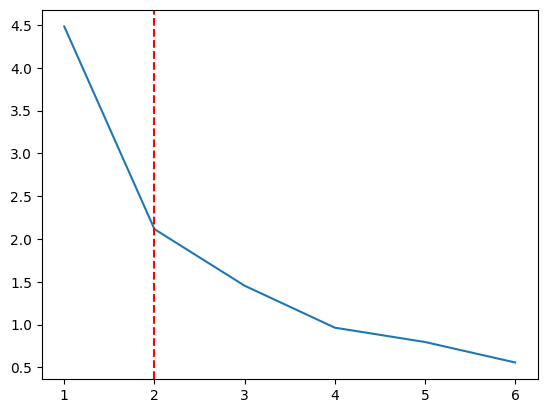

In [31]:
plt.plot(range(1,7),pca.explained_variance_)
plt.xticks(range(1,7))
plt.axvline(x=2,color='red',ls='--')
plt.show()

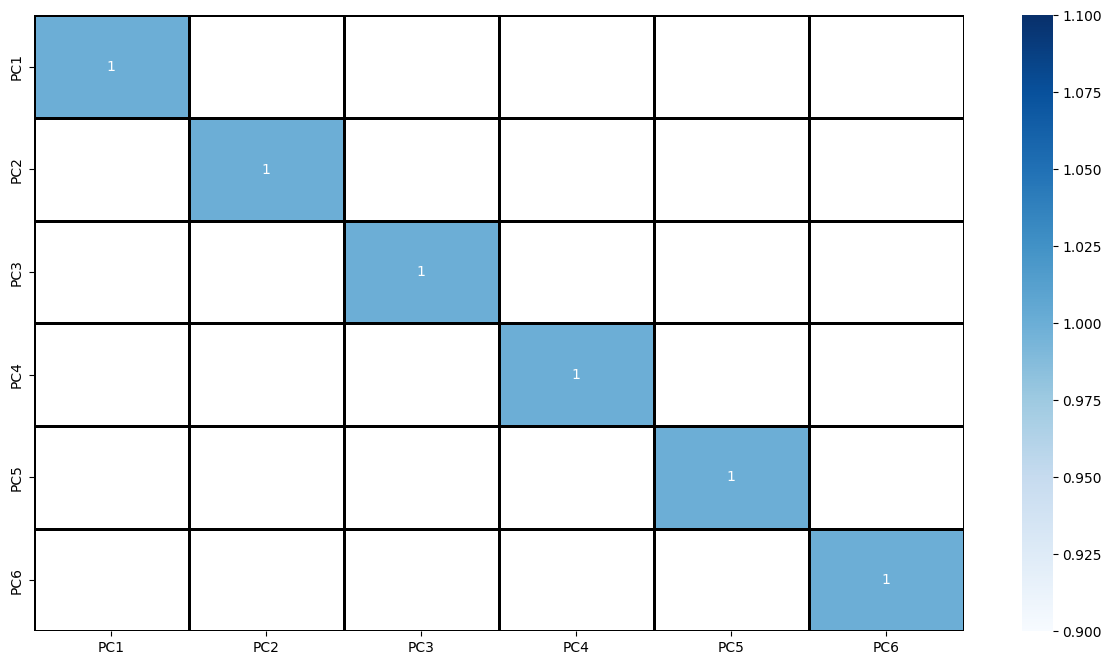

In [32]:
plt.figure(figsize = (15,8))

sns.heatmap(df_pca.corr()[(df_pca.corr() > 0.5) | (df_pca.corr() < -0.5) ] , annot = True , cmap = 'Blues' , 
           linewidth = 1.0 , linecolor = 'Black')
plt.show()

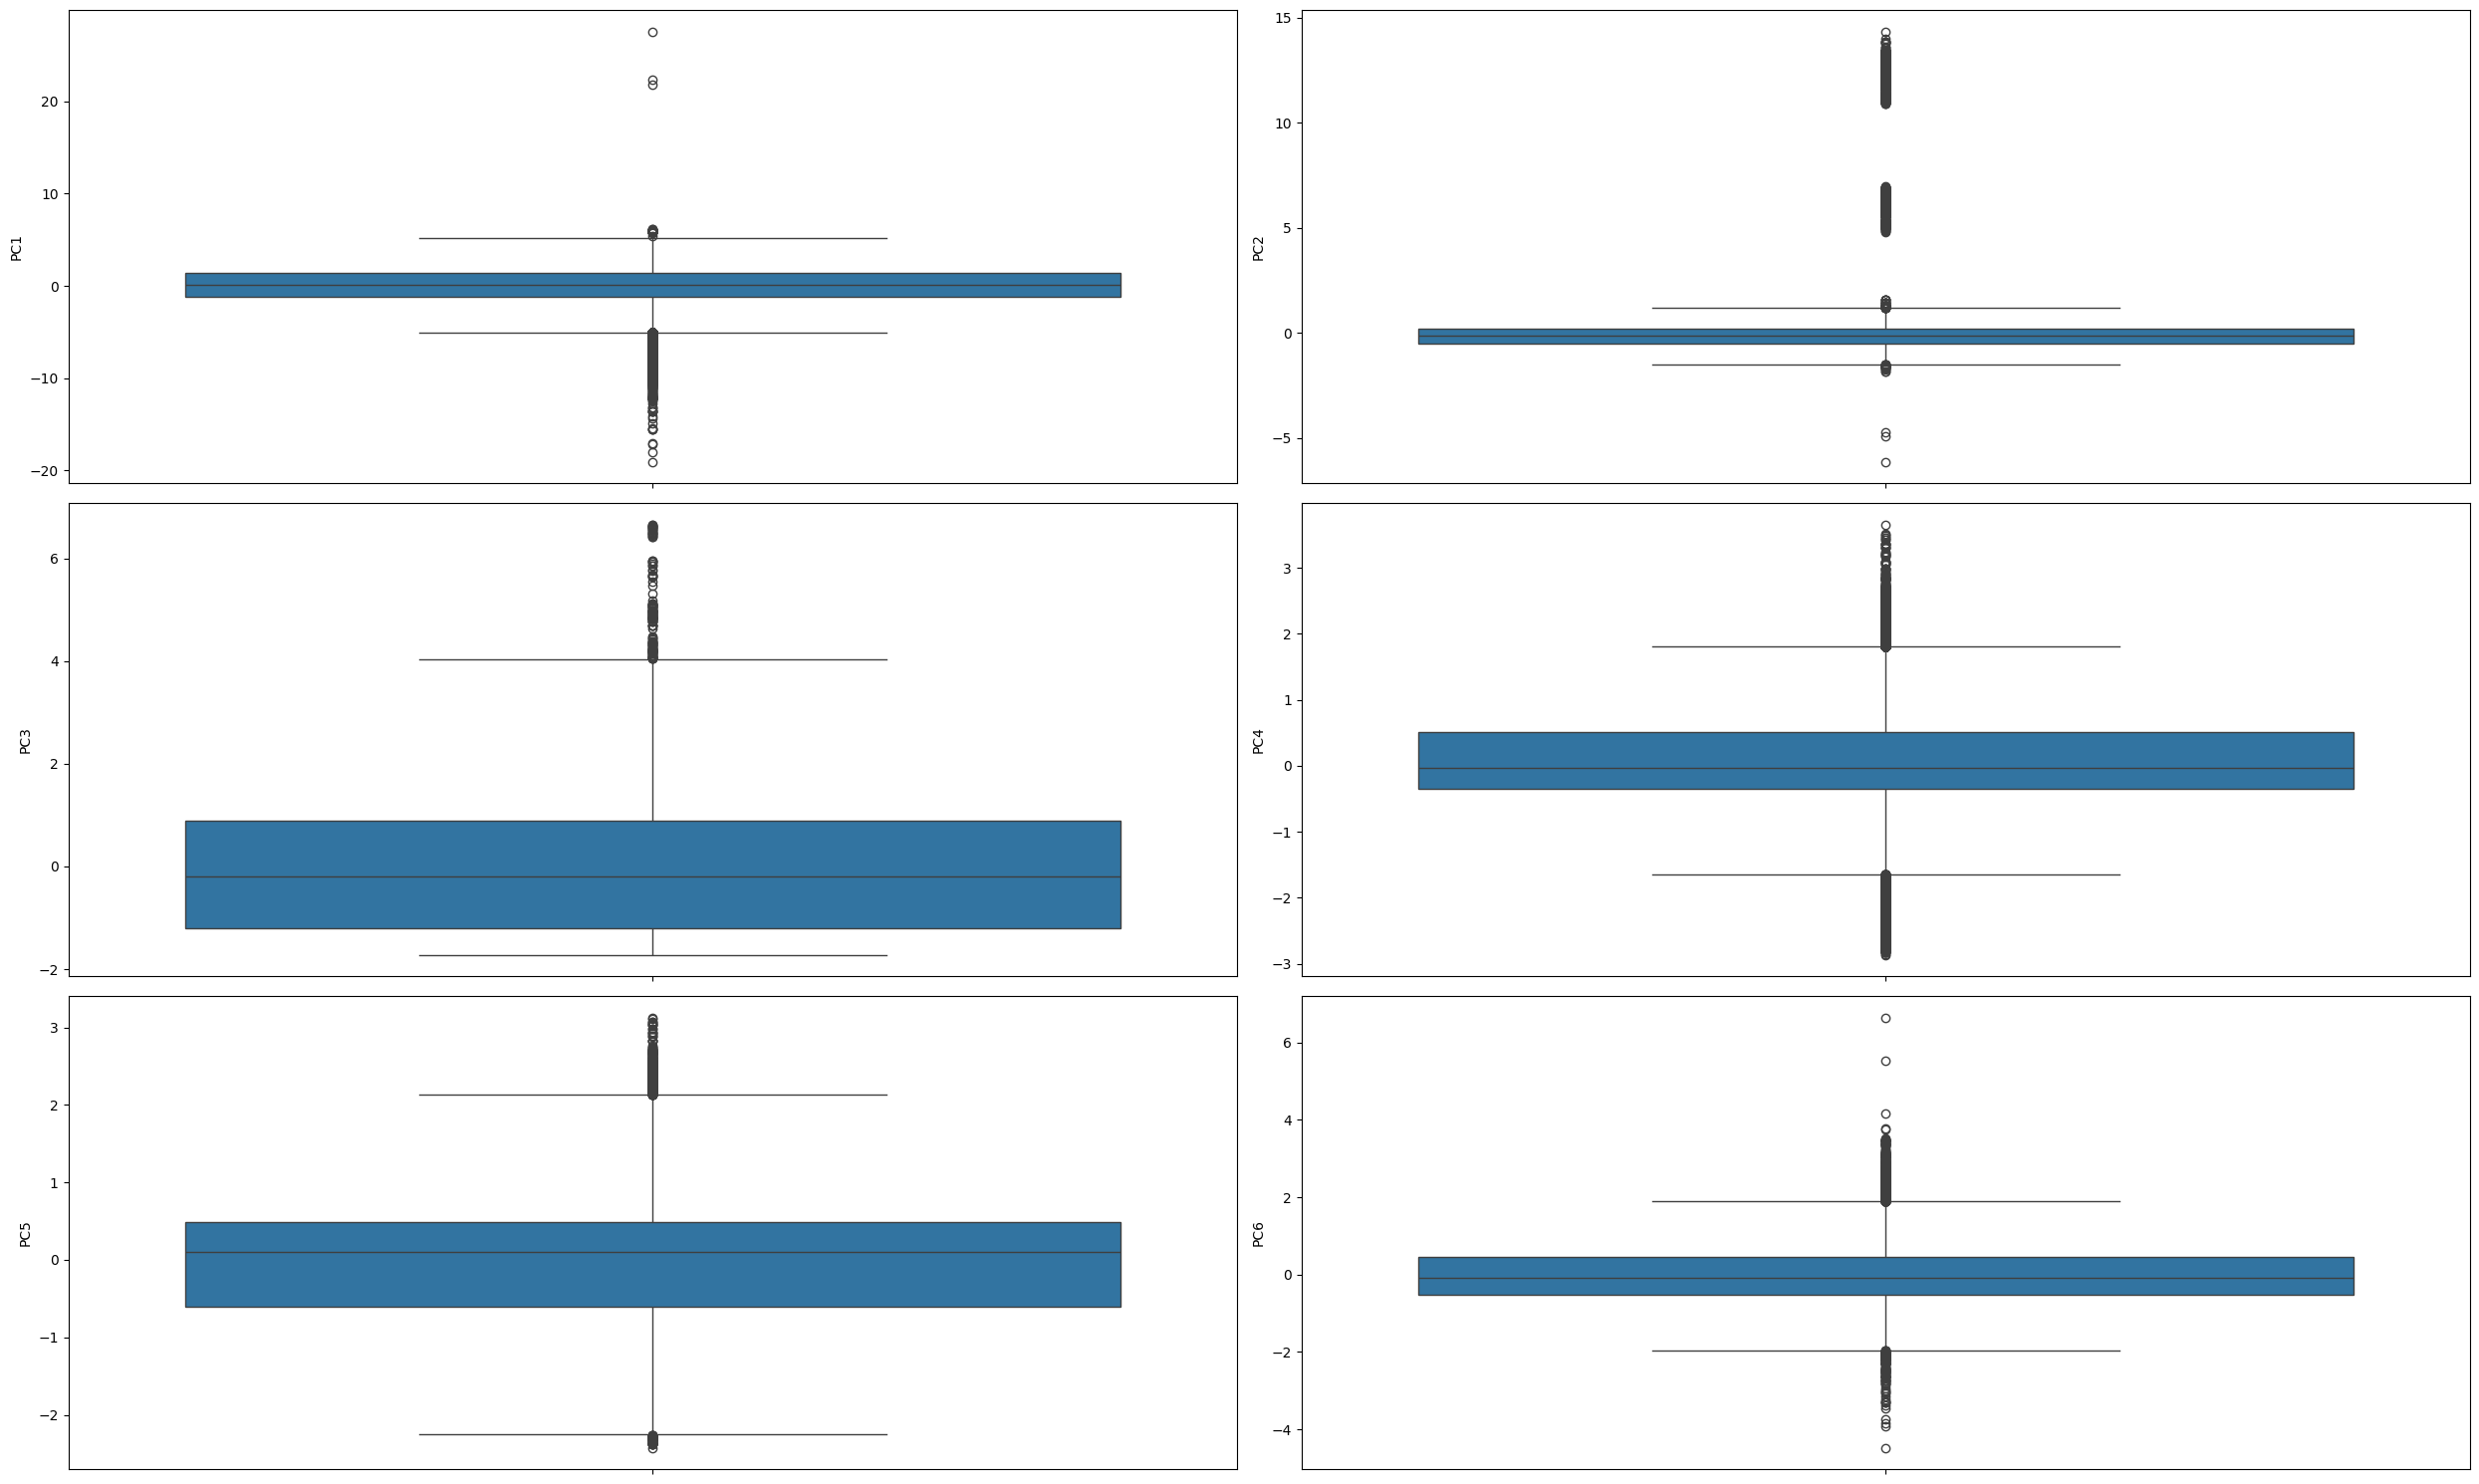

In [33]:
#Checking for outliers in the PCA data and treating the same. 

f , ax = plt.subplots(3,2 , figsize = (25,15))

for i,v in zip(df_pca.columns , ax.flatten()):
    sns.boxplot(y = df_pca[i] , ax = v)
    
plt.tight_layout()
plt.show()

In [34]:
pt = PowerTransformer()

for i in df_pca.columns:
    df_pca[i] = pt.fit_transform(df_pca[[i]])

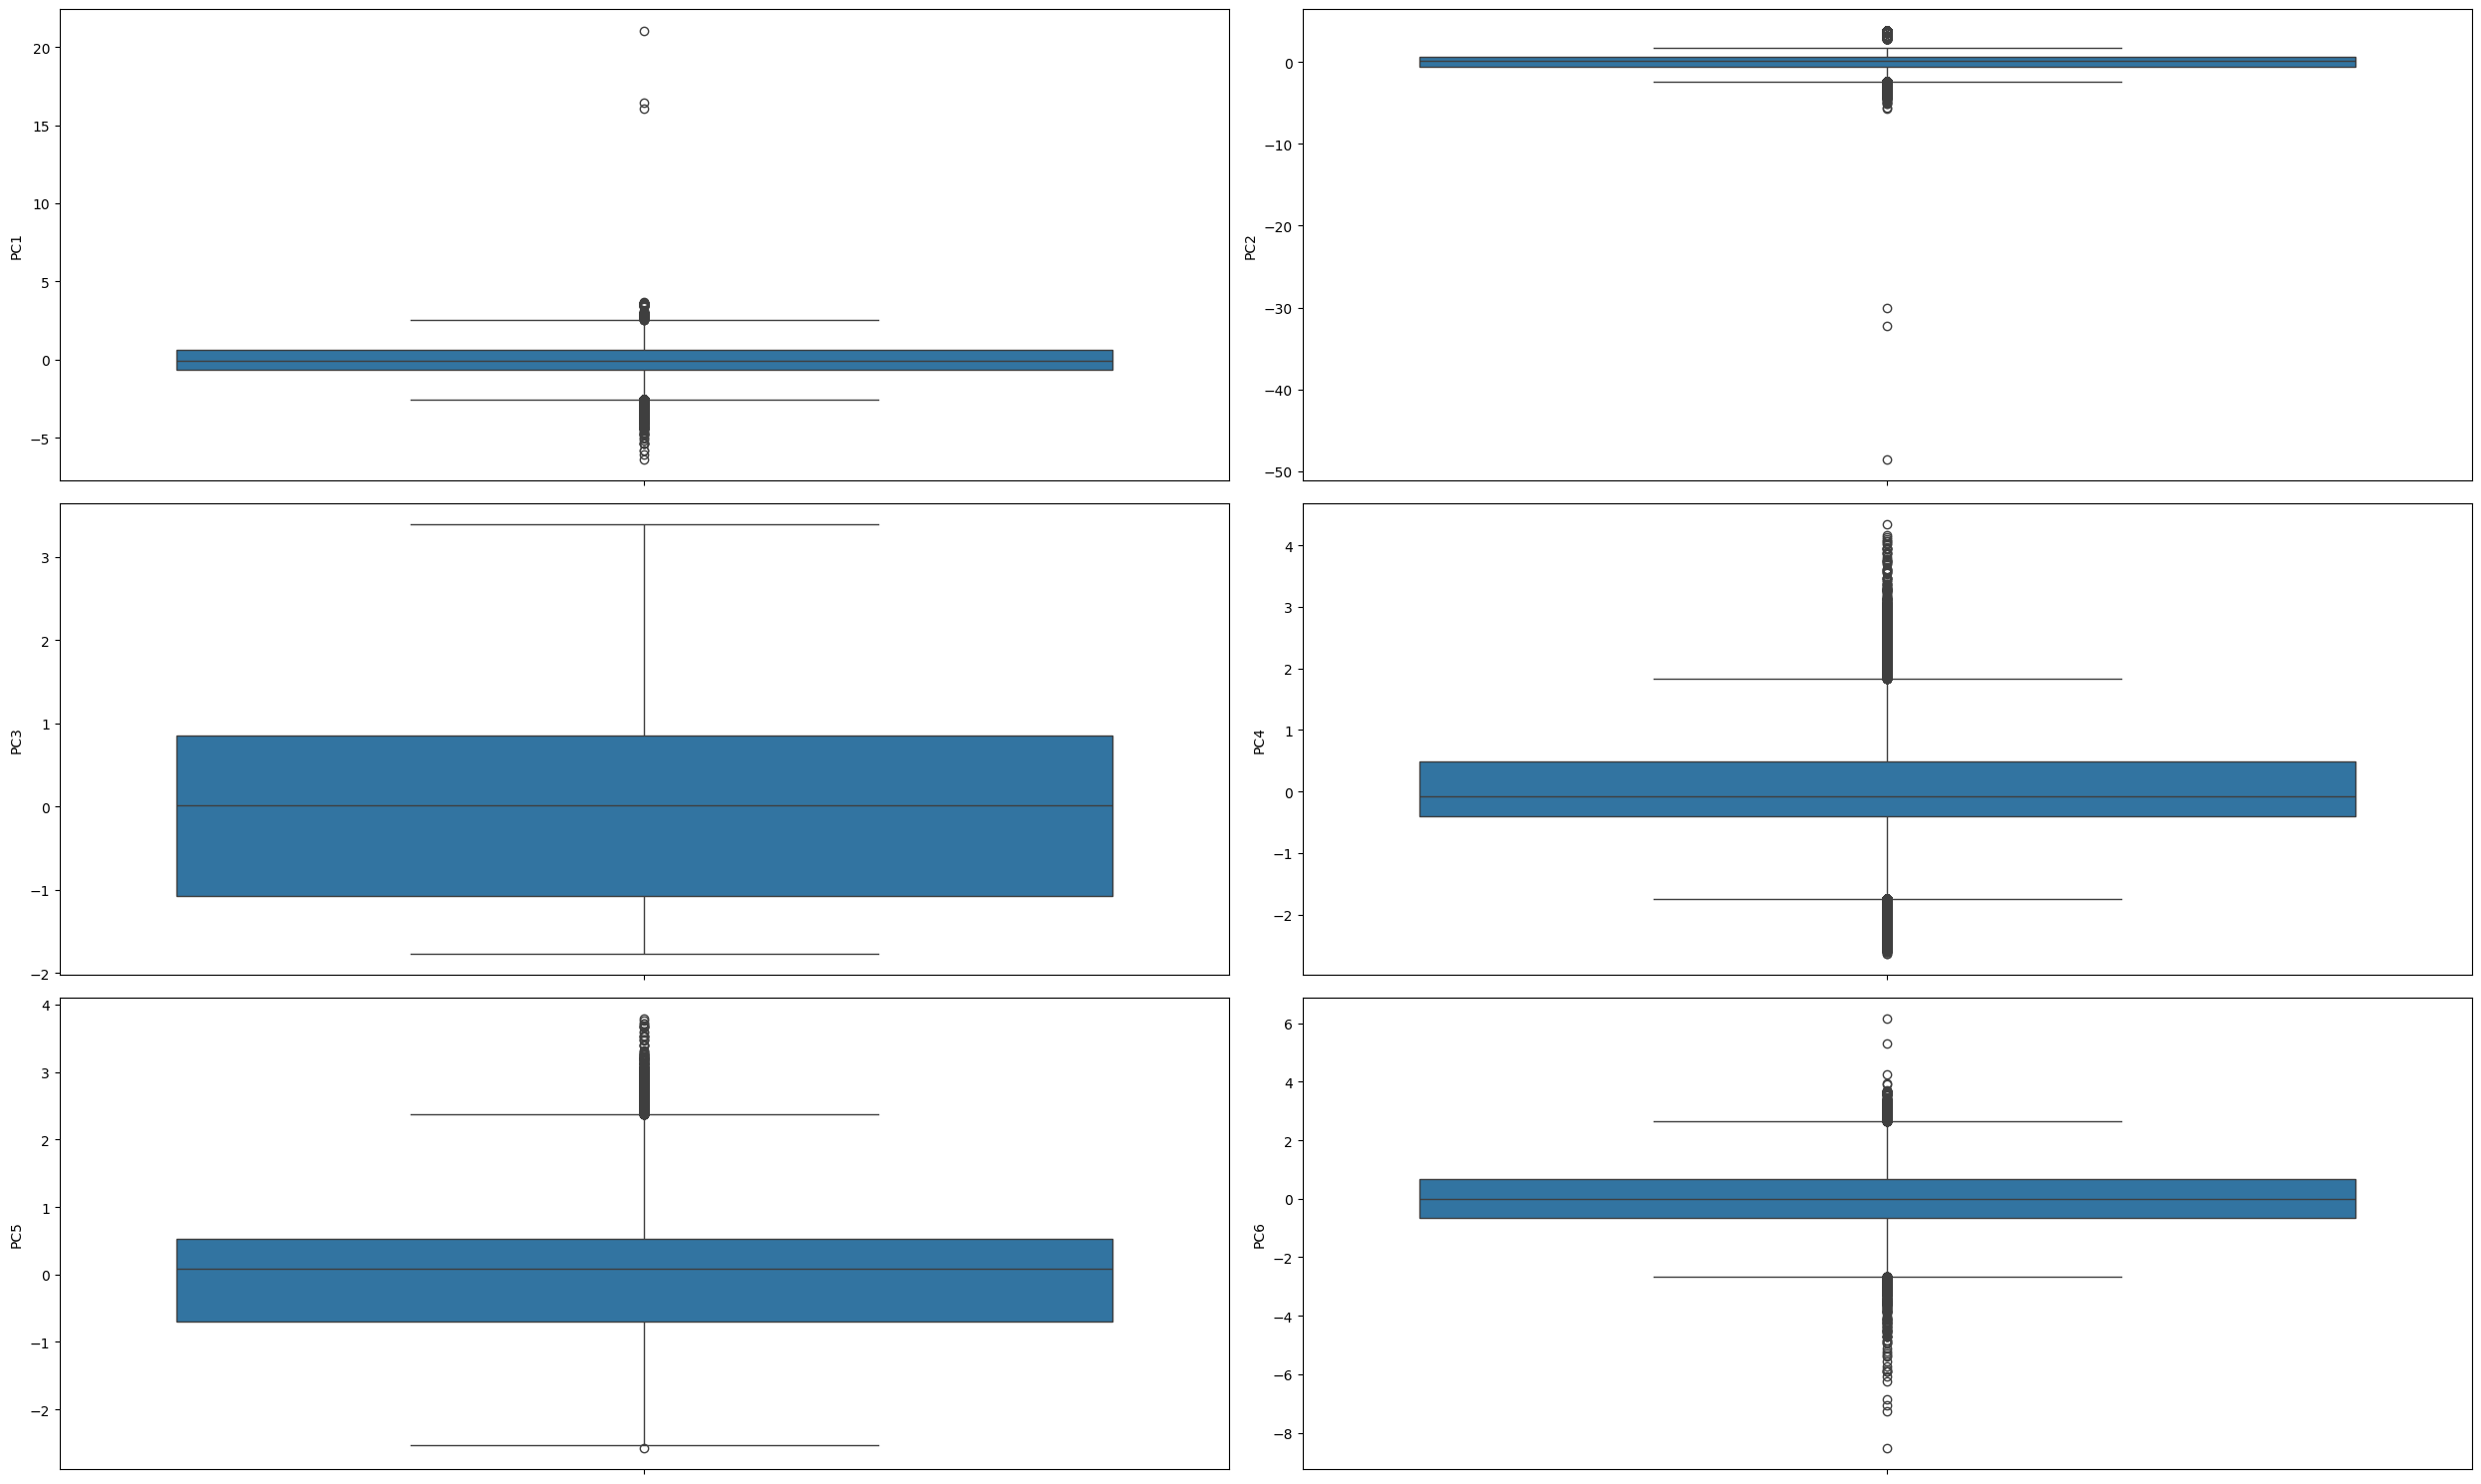

In [35]:
#checking for presence of outliers:

f , ax = plt.subplots(3,2 , figsize = (25,15))

for i,v in zip(df_pca.columns , ax.flatten()):
    sns.boxplot(y = df_pca[i] , ax = v)
    
plt.tight_layout()
plt.show()

In [36]:
f= df_pca.iloc[:, :2]

# Clustering
**K-Means Clustering:**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using silhouette score
for i in range(2, 7):
    model = KMeans(n_clusters=i, n_init='auto', random_state=42).fit(df_pca)
    score = silhouette_score(df_pca, model.labels_)
    print(f"Silhouette score for {i} clusters: {score:.4f}")


In [ ]:
kelbow=pd.DataFrame({'K':[0.272815234704736,0.32475668,0.32837307,0.3422048,0.3683431,0.3816531],
              'WCSS':[792061.276539338,593052.3125,491103.6875,444095.65625,370301.3125,336901.25],
                    'k':[2,3,4,5,6,7]})
plt.plot(kelbow['k'], kelbow.WCSS)

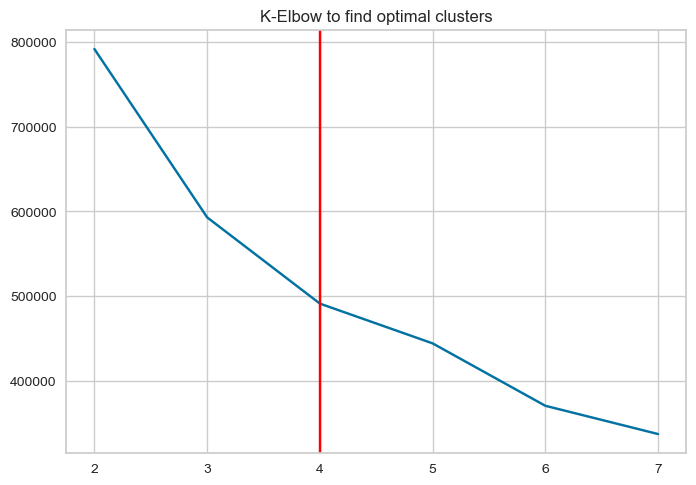

In [265]:
plt.plot(kelbow.k,kelbow.WCSS)
plt.title('K-Elbow to find optimal clusters')
plt.axvline(4, color='red')
plt.show()

#Taking 4 as the optimal clusters 

In [ ]:
final= KMeans(n_clusters=4)
final.fit(df_pca)
pred= final.predict(df_pca)
df_pca['label']=pred

In [266]:
l0=df_sales[df_sales.label==0].describe()
l0.to_excel('output0.xlsx', index=False) 
l0

,Sales_qty,Sales_wo_tradedisc,Sales_atFullPrice,MRP_Value,Coupon_Disc,Trade_Disc,Vendor_Disc,COGS,Booking_Value,Sales_Value_extax,label,age_encoded
count,35057.000000,35057.000000,35057.000000,35057.000000,35057.000000,35057.000000,35057.000000,35057.000000,35057.000000,35057.000000,35057.0,35057.000000
mean,1.308697,0.021565,0.003566,3423.188037,229.374707,1225.091038,0.190266,1476.149232,1984.190470,1936.525512,0.0,6.341587
std,0.757273,0.211336,0.085214,2801.478150,178.147469,1183.895797,10.192550,1285.182234,1717.379438,1696.502424,0.0,1.372682
min,1.000000,0.000000,0.000000,249.000000,3.000000,0.000000,0.000000,0.000000,151.500000,151.117500,0.0,0.000000
25%,1.000000,0.000000,0.000000,1799.000000,114.000000,560.000000,0.000000,719.600000,975.588800,957.800000,0.0,6.000000
50%,1.000000,0.000000,0.000000,2799.000000,188.000000,920.000000,0.000000,1142.850000,1539.000000,1464.971047,0.0,7.000000
75%,1.000000,0.000000,0.000000,3995.000000,288.000000,1420.000000,0.000000,1769.319900,2390.000000,2331.357676,0.0,7.000000
max,15.000000,15.000000,8.000000,41355.000000,2741.000000,17992.000000,1376.919000,20239.531000,25859.520900,25841.580200,0.0,7.000000


In [267]:
l1=df_sales[df_sales.label==1].describe()
l1.to_excel('output1.xlsx', index=False) 
l1

,Sales_qty,Sales_wo_tradedisc,Sales_atFullPrice,MRP_Value,Coupon_Disc,Trade_Disc,Vendor_Disc,COGS,Booking_Value,Sales_Value_extax,label,age_encoded
count,37287.000000,37287.000000,37287.000000,37287.000000,37287.000000,37287.000000,37287.000000,37287.000000,37287.000000,37287.000000,37287.0,37287.000000
mean,1.260895,0.002950,0.002950,2350.614370,82.022547,1271.747285,0.734334,887.137922,1008.374327,924.534973,1.0,1.002923
std,0.872927,0.055699,0.055699,2444.644911,131.117166,1241.366984,36.245043,1004.526469,1244.910714,1078.803733,0.0,1.340760
min,1.000000,0.000000,0.000000,525.000000,0.000000,0.000000,0.000000,-602.640000,0.000000,0.000000,1.0,0.000000
25%,1.000000,0.000000,0.000000,1299.000000,0.000000,715.000000,0.000000,454.650000,474.000000,450.139350,1.0,0.000000
50%,1.000000,0.000000,0.000000,1799.000000,30.000000,1020.000000,0.000000,699.650000,719.047700,682.383434,1.0,0.000000
75%,1.000000,0.000000,0.000000,2869.000000,123.000000,1500.000000,0.000000,1049.650000,1227.180100,1111.430689,1.0,2.000000
max,30.000000,2.000000,2.000000,99950.000000,2750.000000,49980.000000,3038.400000,42364.400000,52237.928000,44269.410320,1.0,7.000000


In [268]:
l2=df_sales[df_sales.label==2].describe()
l2.to_excel('output2.xlsx', index=False) 
l2

,Sales_qty,Sales_wo_tradedisc,Sales_atFullPrice,MRP_Value,Coupon_Disc,Trade_Disc,Vendor_Disc,COGS,Booking_Value,Sales_Value_extax,label,age_encoded
count,62130.000000,62130.000000,62130.000000,62130.000000,62130.000000,62130.000000,62130.000000,62130.000000,62130.000000,62130.000000,62130.0,62130.000000
mean,1.114389,0.027008,0.027008,2825.616498,0.000080,992.576781,0.034722,1356.932999,1846.473886,1823.355920,2.0,6.667182
std,0.408863,0.181855,0.181855,1812.579883,0.014465,784.016906,3.017160,959.972515,1237.423947,1225.864365,0.0,1.048994
min,1.000000,0.000000,0.000000,249.000000,0.000000,0.000000,0.000000,0.000000,174.000000,174.000000,2.0,0.000000
25%,1.000000,0.000000,0.000000,1785.000000,0.000000,508.000000,0.000000,729.894400,1051.260400,1042.420000,2.0,7.000000
50%,1.000000,0.000000,0.000000,2499.000000,0.000000,810.000000,0.000000,1132.233900,1550.696050,1516.291673,2.0,7.000000
75%,1.000000,0.000000,0.000000,3499.000000,0.000000,1260.000000,0.000000,1697.751500,2282.221675,2265.950000,2.0,7.000000
max,10.000000,8.000000,8.000000,39980.000000,3.000000,17992.000000,458.973000,17392.384400,28227.000000,25199.162860,2.0,7.000000


In [269]:
l3=df_sales[df_sales.label==3].describe()
l3.to_excel('output3.xlsx', index=False) 
l3

,Sales_qty,Sales_wo_tradedisc,Sales_atFullPrice,MRP_Value,Coupon_Disc,Trade_Disc,Vendor_Disc,COGS,Booking_Value,Sales_Value_extax,label,age_encoded
count,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.0,20067.000000
mean,1.257487,0.002591,0.000648,3792.002541,187.234100,1314.140230,978.145354,1557.416056,2307.924001,2060.143752,3.0,2.863358
std,0.686348,0.089814,0.050410,2702.824172,218.533373,1173.181945,919.873718,1135.691839,1648.302242,1466.233724,0.0,1.986967
min,1.000000,0.000000,0.000000,525.000000,0.000000,79.000000,52.500000,151.040000,360.379600,306.317219,3.0,0.000000
25%,1.000000,0.000000,0.000000,2015.000000,0.000000,618.000000,444.977700,868.451400,1299.000000,1153.780000,3.0,1.000000
50%,1.000000,0.000000,0.000000,3295.000000,151.000000,992.000000,715.000000,1266.026600,1906.000000,1701.770000,3.0,3.000000
75%,1.000000,0.000000,0.000000,4460.000000,270.000000,1538.000000,1198.000000,1851.474300,2729.000000,2434.532125,3.0,3.000000
max,12.000000,9.000000,5.000000,31465.000000,2479.000000,16956.000000,15032.500000,14419.960100,19778.287100,17653.908330,3.0,7.000000


# Classification
**Random Forest Classification:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# KMeans Clustering Classification
X = df_pca.drop(columns=['label'])
y_km = df_pca['label']

X_train, X_test, y_train, y_test = train_test_split(X, y_km, test_size=0.30, random_state=24)
rf_km = RandomForestClassifier(random_state=24).fit(X_train, y_train)
y_pred_km = rf_km.predict(X_test)

print('KMeans Cluster Classification')
print('Accuracy:', accuracy_score(y_test, y_pred_km))
print('F1 Score:', f1_score(y_test, y_pred_km, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_km))

In [ ]:
#Targetting 

In [272]:
cluster= df_final[(df_final.label==2 )]
cluster

,Sales_qty,Sales_wo_tradedisc,Sales_atFullPrice,MRP_Value,Coupon_Disc,Trade_Disc,Vendor_Disc,COGS,Booking_Value,Sales_Value_extax,age_encoded,master_category_Apparel,master_category_Footwear,master_category_others,season_Code_FW19,season_Code_Old,season_Code_SS18,season_Code_SS19,gender_mapped_Unisex,gender_mapped_Women,label
96,-0.411401,-0.121906,-0.106743,1.018484,1.203041,-0.049019,2.583593,0.892627,1.281997,1.179041,-1.703574,1,0,0,0,1,0,0,0,0,2
101,2.430688,-0.121906,-0.106743,0.848682,1.141884,-0.186081,2.583592,0.705166,1.173285,1.070043,-0.623711,1,0,0,0,1,0,0,0,0,2
110,-0.411401,-0.121906,-0.106743,0.835013,1.203041,-0.196875,2.583592,0.690626,1.098583,0.996714,-0.623711,1,0,0,0,1,0,0,0,0,2
113,-0.411401,-0.121906,-0.106743,-0.285595,-0.873147,-0.970858,2.583585,-0.279364,0.267983,0.169136,-0.623711,1,0,0,0,1,0,0,0,0,2
119,-0.411401,-0.121906,-0.106743,-0.285595,1.141884,-0.970858,2.583585,-0.279364,0.122292,0.023946,-1.703574,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154492,-0.411401,-0.121906,-0.106743,0.690392,1.177595,0.705431,2.583595,0.114326,0.465535,0.366301,0.816106,1,0,0,0,1,0,0,0,0,2
154510,-0.411401,-0.121906,-0.106743,-0.734797,1.132422,-0.647303,2.583589,-0.677991,-0.614327,-0.622626,0.456152,1,0,0,0,1,0,0,0,1,2
154511,-0.411401,-0.121906,-0.106743,0.139506,1.193680,0.136701,2.583594,-0.320464,-0.029253,-0.125781,-0.623711,1,0,0,0,1,0,0,0,1,2
154515,-0.411401,-0.121906,-0.106743,0.538891,-0.873147,0.665262,2.583595,-0.127479,0.395102,0.296682,0.816106,1,0,0,0,1,0,0,0,1,2


In [276]:
y=cluster['Coupon_Disc']
x=cluster.drop(columns=['Coupon_Disc', 'label'])
from sklearn.model_selection import train_test_split 
xtrain , xtest , ytrain , ytest = train_test_split(x,y , test_size = 0.30 , random_state = 100) 


In [277]:
import statsmodels.api as sma
t_train = sma.add_constant(xtrain)
t_test = sma.add_constant (ytest)
model = sma.OLS (ytrain,t_train).fit()
model.summary()

#very high multicolinearity 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coupon_Disc   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1240.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:38:29   Log-Likelihood:                -13579.
No. Observations:               14046   AIC:                         2.719e+04
Df Residuals:                   14029   BIC:                         2.732e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.518e+11   1.81e+11     -0.840      0.401   -5.06e+11    2.03e+11
Sales_qty                    0.2403      0.008     31.975      0.000       0.226       0.255
Sales_wo_tradedisc          -0.1232      0.019     -6.631      0.000      -0.160      -0.087
Sales_atFullPrice           -0.3423      0.050     -6.809      0.000      -0.441      -0.244
MRP_Value                    5.2308      0.052    101.516      0.000       5.130       5.332
Trade_Disc                  -2.0611      0.022    -91.638      0.000      -2.105      -2.017
Vendor_Disc              -9529.6206    961.159     -9.915      0.000   -1.14e+04   -7645.621
COGS                         2.2356      0.026     84.475      0.000       2.184       2.288
Booking_Value               -5.0686      0.264    -19.179      0.000      -5.587      -4.551
Sales_Value_extax           -1.2740      0.264     -4.832      0.000      -1.791      -0.757
age_encoded                 -0.0274      0.009     -3.184      0.001      -0.044      -0.011
master_category_Apparel      2.7388      0.052     52.861      0.000       2.637       2.840
master_category_Footwear -9.263e+05    1.1e+06     -0.840      0.401   -3.09e+06    1.24e+06
master_category_others       2.0677      0.063     32.699      0.000       1.944       2.192
season_Code_FW19          1.518e+11   1.81e+11      0.840      0.401   -2.03e+11    5.06e+11
season_Code_Old           1.518e+11   1.81e+11      0.840      0.401   -2.03e+11    5.06e+11
season_Code_SS18          2.301e+04   2.74e+04      0.840      0.401   -3.07e+04    7.67e+04
season_Code_SS19          1.518e+11   1.81e+11      0.840      0.401   -2.03e+11    5.06e+11
gender_mapped_Unisex        -0.2634      0.048     -5.438      0.000      -0.358      -0.168
gender_mapped_Women          0.0787      0.012      6.456      0.000       0.055       0.103
==============================================================================
Omnibus:                      339.482   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.502
Skew:                          -0.052   Prob(JB):                    2.21e-172
Kurtosis:                       4.158   Cond. No.                     1.91e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.34e-38. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [280]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf= [vif(xtrain.values,i)  for i in range(xtrain.shape[1])]
VIF= pd.DataFrame({'Columns':xtrain.columns, 'VIF':vf})

,Columns,VIF
0,Sales_qty,2.301510e+00
1,Sales_wo_tradedisc,1.237023e+00
2,Sales_atFullPrice,1.119496e+00
3,MRP_Value,7.369572e+01
4,Trade_Disc,1.553762e+01
5,Vendor_Disc,4.361437e+00
6,COGS,2.089253e+01
7,Booking_Value,1.625497e+03
8,Sales_Value_extax,1.578979e+03
9,age_encoded,1.303868e+00


In [281]:
VIF.sort_values(by='VIF')

,Columns,VIF
2,Sales_atFullPrice,1.119496e+00
1,Sales_wo_tradedisc,1.237023e+00
18,gender_mapped_Women,1.248722e+00
9,age_encoded,1.303868e+00
17,gender_mapped_Unisex,1.365889e+00
0,Sales_qty,2.301510e+00
12,master_category_others,2.403568e+00
5,Vendor_Disc,4.361437e+00
10,master_category_Apparel,6.921276e+00
4,Trade_Disc,1.553762e+01


In [285]:
#Drop high multicolinearity column 
y=cluster['Coupon_Disc']
x=cluster.drop(columns=['Coupon_Disc', 'label','season_Code_Old'])
from sklearn.model_selection import train_test_split 
xtrain , xtest , ytrain , ytest = train_test_split(x,y , test_size = 0.30 , random_state = 100) 

import statsmodels.api as sma
t_train = sma.add_constant(xtrain)
t_test = sma.add_constant (ytest)
model = sma.OLS (ytrain,t_train).fit()
model.summary()

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf= [vif(xtrain.values,i)  for i in range(xtrain.shape[1])]
VIF= pd.DataFrame({'Columns':xtrain.columns, 'VIF':vf})
VIF.sort_values(by='VIF')

C:\Users\tabas\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Columns,VIF
15,season_Code_SS19,1.004288
1,Sales_wo_tradedisc,1.366680
16,gender_mapped_Unisex,1.377028
13,season_Code_FW19,1.503328
2,Sales_atFullPrice,2.081067
17,gender_mapped_Women,2.129866
0,Sales_qty,2.317390
12,master_category_others,2.389794
9,age_encoded,2.471140
4,Trade_Disc,16.017701


In [286]:
#H0: Data has linear relationship with Target 
#Ha: Data has no linear relationship with Target
sma.stats.linear_rainbow(model)

(1.037198227491665, 0.06309107781515207)

In [289]:
import scipy.stats as stats
#Ho:Residuals are normally distributed
#Ha:Residuals are not normally distributed
stats.jarque_bera(model.resid)


SignificanceResult(statistic=791.005637703106, pvalue=1.719127927620961e-172)

In [290]:
#H0:Independent variables have equal variance in errors
#Ha:Independent variables do not have equal variance in errors
import statsmodels.stats.api as ssa
ssa.het_breuschpagan(model.resid, model.model.exog)


(2085.962232765118, 0.0, 152.925751223545, 0.0)

In [291]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)


1.997427389163171

In [294]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lr= LinearRegression()

sfs_forward = sfs(estimator=lr,k_features='best',scoring='r2',forward=True)
sfs_forward.fit(xtrain,ytrain)
best_features = list(sfs_forward.k_feature_names_)
model_sfs_f = lr.fit(xtrain[best_features],ytrain)   
pred_train = model_sfs_f.predict(xtrain[best_features])   
pred_test = model_sfs_f.predict(xtest[best_features])     
r2_train = round(r2_score(ytrain , pred_train),3)  
r2_test = round(r2_score(ytest, pred_test),3)    

print('r2 train:', r2_train, 'r2 test:', r2_test )

r2 train: 0.586 r2 test: 0.593


In [296]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sfs_backward = sfs(estimator=lr,k_features='best',scoring='r2',forward=False)
sfs_backward.fit(xtrain,ytrain)
best_features = list(sfs_backward.k_feature_names_)
model_sfs_b = lr.fit(xtrain[best_features],ytrain)   
pred_train = model_sfs_b.predict(xtrain[best_features])   
pred_test = model_sfs_b.predict(xtest[best_features])     
r2_train = round(r2_score(ytrain , pred_train),3)  
r2_test = round(r2_score(ytest, pred_test),3)    

print('r2 train:', r2_train, 'r2 test:', r2_test )

r2 train: 0.586 r2 test: 0.593


In [298]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error 
performance_df = pd.DataFrame(columns = ['Model','R2_Train','R2_Test','RMSE_Train','RMSE_Test','MAE_Train','MAE_Test']) 
performance_df

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test


In [299]:
def model_performance(model , name , xtrain = xtrain , xtest = xtest): 
    global performance_df          
    pred_train = model.predict(xtrain)   
    pred_test = model.predict(xtest)     
    r2_train = round(r2_score(ytrain , pred_train),3)  
    r2_test = round(r2_score(ytest , pred_test),3)    
    rmse_train = round(np.sqrt(mean_squared_error(ytrain , pred_train)),2) 
    rmse_test = round(np.sqrt(mean_squared_error(ytest , pred_test)),2)    
    mae_train = round(mean_absolute_error(ytrain , pred_train),2)   
    mae_test = round(mean_absolute_error(ytest , pred_test),2)      
    new_row = pd.DataFrame({'Model':name,         
                                            'R2_Train': [r2_train], 
                                            'R2_Test': [r2_test], 
                                            'RMSE_Train':[rmse_train],  
                                            'RMSE_Test':[rmse_test],  
                                            'MAE_Train':[mae_train],
                                            'MAE_Test':[mae_test]})
 
    performance_df = pd.concat([performance_df, new_row], ignore_index=True)

In [300]:
from sklearn.linear_model import LinearRegression 
model_lr = LinearRegression().fit(xtrain , ytrain) 
model_performance(model_lr,'Linear Regression' )
performance_df

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52


In [301]:
from sklearn.ensemble import RandomForestRegressor  
model_rf = RandomForestRegressor().fit(xtrain , ytrain)  
model_performance(model_rf , 'RandomForest w/o tuning')  
performance_df

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11


In [302]:
from sklearn.ensemble import AdaBoostRegressor  
model_ab = AdaBoostRegressor().fit(xtrain , ytrain)  
model_performance(model_ab , 'AdaBost w/o tuning')  
performance_df

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11
2,AdaBost w/o tuning,0.113,0.112,0.93,0.93,0.89,0.89


In [303]:
from sklearn.ensemble import GradientBoostingRegressor  
model_gb = GradientBoostingRegressor().fit(xtrain , ytrain)  
model_performance(model_gb , 'GradientBoosting w/o tuning')  
performance_df

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11
2,AdaBost w/o tuning,0.113,0.112,0.93,0.93,0.89,0.89
3,GradientBoosting w/o tuning,0.621,0.595,0.61,0.63,0.51,0.52


In [304]:
from xgboost import XGBRegressor  
model_xgb = XGBRegressor().fit(xtrain , ytrain)  
model_performance(model_xgb , 'XGBoost w/o tuning') 
performance_df

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11
2,AdaBost w/o tuning,0.113,0.112,0.93,0.93,0.89,0.89
3,GradientBoosting w/o tuning,0.621,0.595,0.61,0.63,0.51,0.52
4,XGBoost w/o tuning,0.963,0.889,0.19,0.33,0.11,0.17


In [308]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
model_sgd=sgd.fit(xtrain,ytrain)
model_performance(model_sgd , 'Stochastic Gradient Descent') 
performance_df

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11
2,AdaBost w/o tuning,0.113,0.112,0.93,0.93,0.89,0.89
3,GradientBoosting w/o tuning,0.621,0.595,0.61,0.63,0.51,0.52
4,XGBoost w/o tuning,0.963,0.889,0.19,0.33,0.11,0.17
5,Stochastic Gradient Descent,0.562,0.571,0.65,0.65,0.57,0.56


In [310]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=True,random_state=1)

lr = LinearRegression()
rmse_kf = []

for train_index, test_index in kf.split(xtrain):
    kf_xtrain = xtrain.iloc[train_index]
    kf_xtest = xtrain.iloc[test_index]
    kf_ytrain = ytrain.iloc[train_index]
    kf_ytest = ytrain.iloc[test_index]
    
   
    kfold = lr.fit(kf_xtrain,kf_ytrain)
    pred = kfold.predict(kf_xtest)
    rmse_kf.append(np.sqrt(mean_squared_error(kf_ytest,pred)))
np.mean(rmse_kf)

#Similar to rmse with train test split, no need to worry for overfitting

0.6387477902532075

In [312]:
from sklearn.neighbors import KNeighborsRegressor  
model_knn = KNeighborsRegressor().fit(xtrain , ytrain)  
model_performance(model_knn , 'KNN w/o tuning') 
performance_df

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11
2,AdaBost w/o tuning,0.113,0.112,0.93,0.93,0.89,0.89
3,GradientBoosting w/o tuning,0.621,0.595,0.61,0.63,0.51,0.52
4,XGBoost w/o tuning,0.963,0.889,0.19,0.33,0.11,0.17
5,Stochastic Gradient Descent,0.562,0.571,0.65,0.65,0.57,0.56
6,KNN w/o tuning,0.898,0.827,0.31,0.41,0.11,0.16


In [314]:
from sklearn.model_selection import GridSearchCV  
params = {'n_estimators' : [100,150,200] ,  
              'max_depth' : [5,6,7],          'max_features' : [None , 'sqrt' , 'log'] , 
              'min_samples_split' : [4,5,6,7]}  
grid_rf = GridSearchCV(estimator = RandomForestRegressor() ,
                           param_grid = params , cv = 3).fit(xtrain , ytrain) 
print(grid_rf.best_params_) 
model_rf_tuned = grid_rf.best_estimator_.fit(xtrain , ytrain)
model_performance(model_rf_tuned , 'RandomForest with tuning') 
performance_df

C:\Users\tabas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tabas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tabas\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\tabas\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\tabas\anaconda3\Lib\site-pack

{'max_depth': 7, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 100}


,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11
2,AdaBost w/o tuning,0.113,0.112,0.93,0.93,0.89,0.89
3,GradientBoosting w/o tuning,0.621,0.595,0.61,0.63,0.51,0.52
4,XGBoost w/o tuning,0.963,0.889,0.19,0.33,0.11,0.17
5,Stochastic Gradient Descent,0.562,0.571,0.65,0.65,0.57,0.56
6,KNN w/o tuning,0.898,0.827,0.31,0.41,0.11,0.16
7,RandomForest with tuning,0.382,0.362,0.78,0.79,0.63,0.64


In [315]:
params = {'n_neighbors': [10,30,50,70,90,100]}
grid_knn = GridSearchCV(estimator = KNeighborsRegressor() 
                        , param_grid = params , cv = 3).fit(xtrain , ytrain)
print(grid_knn.best_params_) 
model_knn_tuned = grid_knn.best_estimator_.fit(xtrain , ytrain) 
model_performance(model_knn_tuned , 'KNN with tuning') 
performance_df

{'n_neighbors': 10}


,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11
2,AdaBost w/o tuning,0.113,0.112,0.93,0.93,0.89,0.89
3,GradientBoosting w/o tuning,0.621,0.595,0.61,0.63,0.51,0.52
4,XGBoost w/o tuning,0.963,0.889,0.19,0.33,0.11,0.17
5,Stochastic Gradient Descent,0.562,0.571,0.65,0.65,0.57,0.56
6,KNN w/o tuning,0.898,0.827,0.31,0.41,0.11,0.16
7,RandomForest with tuning,0.382,0.362,0.78,0.79,0.63,0.64
8,KNN with tuning,0.826,0.772,0.41,0.47,0.18,0.22


In [316]:
params = {'learning_rate': [0.1,0.2,0.5,0.8,1.0],
          'n_estimators': [150,175,200]          } 
grid_xgb = GridSearchCV(estimator = XGBRegressor() ,
                        param_grid = params , cv = 3).fit(xtrain , ytrain)
print(grid_xgb.best_params_) 
model_xgb_tuned = grid_xgb.best_estimator_.fit(xtrain , ytrain) 
model_performance(model_xgb_tuned , 'XGBoost with tuning') 
performance_df

{'learning_rate': 0.5, 'n_estimators': 200}


,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test
0,Linear Regression,0.586,0.593,0.64,0.63,0.52,0.52
1,RandomForest w/o tuning,0.986,0.898,0.12,0.31,0.04,0.11
2,AdaBost w/o tuning,0.113,0.112,0.93,0.93,0.89,0.89
3,GradientBoosting w/o tuning,0.621,0.595,0.61,0.63,0.51,0.52
4,XGBoost w/o tuning,0.963,0.889,0.19,0.33,0.11,0.17
5,Stochastic Gradient Descent,0.562,0.571,0.65,0.65,0.57,0.56
6,KNN w/o tuning,0.898,0.827,0.31,0.41,0.11,0.16
7,RandomForest with tuning,0.382,0.362,0.78,0.79,0.63,0.64
8,KNN with tuning,0.826,0.772,0.41,0.47,0.18,0.22
9,XGBoost with tuning,0.991,0.898,0.09,0.32,0.05,0.14


CONCLUSION:

Best Algorithm for prediction: XGBoost with tuned hyper parameters


In our project, we observed that XGBoost with tuning outperformed other models, which can be attributed to several key factors tailored to our specific dataset and objectives. Firstly, through meticulous tuning of hyperparameters such as learning rate, tree depth, and regularization, XGBoost effectively adapted to the intricacies of our ecommerce data, enhancing its ability to capture complex relationships and avoid overfitting. 

Additionally, XGBoost's inherent robustness and versatility within the gradient boosting framework aligned well with the diverse nature of our dataset, enabling it to handle various features and patterns effectively.

Moreover, the tuning process helped mitigate potential issues like underfitting or overfitting, ensuring that the model's performance generalized well to unseen data, a critical requirement for our project's real-world deployment within the ecommerce domain. 

In essence, the combination of XGBoost's powerful algorithmic foundation and the fine-tuning approach tailored to our project's needs ultimately led to its superior performance, providing an increased score from the base model of 51%.
